# ANALISI DEGLI SPETTRI ODMR

Gli spettri sono stati allineati; c'è un file per ogni distanza del magnete.
 Ora c'è da analizzare, incrociare con il campo magentico e altre cose. Procediamo per gradi. 

In [309]:
from odmr_subroutines.analysis_subroutines import *

def build_name (dist):
    return f"data/cristallo2_aligned/odmr_dist_{dist}.csv"

distanze = [17, 19, 20, 22, 24, 30, 33, 39, 40, 1000]

## MANIPOLAZIONE DEL BACKGROUND

Fittiamo il segnale per ripulire il background. L'andamento generale somiglia a una retta + sinusoide con periodo proporzionale a x. Vengono provate diverse combinazioni di polinomio + seno. 

### Cubica

Sicuramente possiamo partire da una certezza: va sottratto un polinomio all'intero spettro, perché ha una sorta di 'pendenza' da un lato all'altro. Una retta non è sufficiente però; si sceglie di usare una cubica.

In [310]:
# la regione sinusoidale a sinistra dipende dalla distanza
vec_regione_sx = [(2500,2580),(2500,2560),(2500,2560),(2500,2575),
              (2500,2535),(2500,2555),(2500,2555),(2500,2530),
              (2500,2660),(2500,2550)]
vec_regione_dx = [(2620,2750),(2627,2750),(2620,2750),(2660,2750), 
              (2640,2750),(2660,2750),(2660,2750),(2660,2750),
              (2680,2750),(2700,2750)]

È poco efficiente ma leggo prima gli spettri e li immagazzino, tutto ciò per normalizzare rispetto al deep più basso di tutti. *OCCHIO*: la normalizzazione va fatta **dopo** la sottrazione della cubica.

In [311]:
spettri = []

for i, dist in enumerate( reversed(distanze) ):
    nome = build_name(dist)
    spettro = leggi_file_odmr(nome) 
    spettri.append(spettro)

FUNZIONE DI FIT: cub_func
PARAMETRI FIT: [ 1.13279070e-10 -9.65882680e-07  2.70405038e-03 -1.46478089e+00]


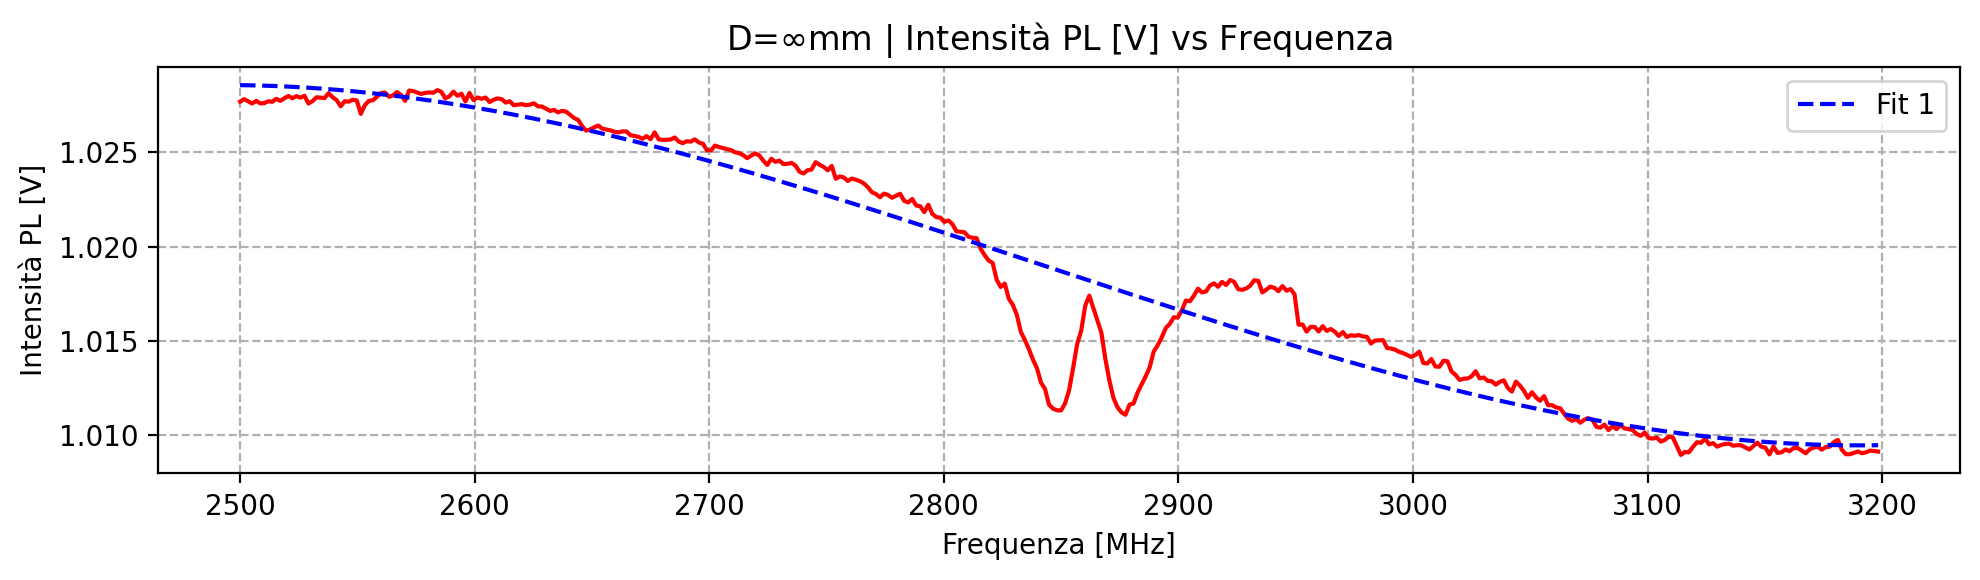

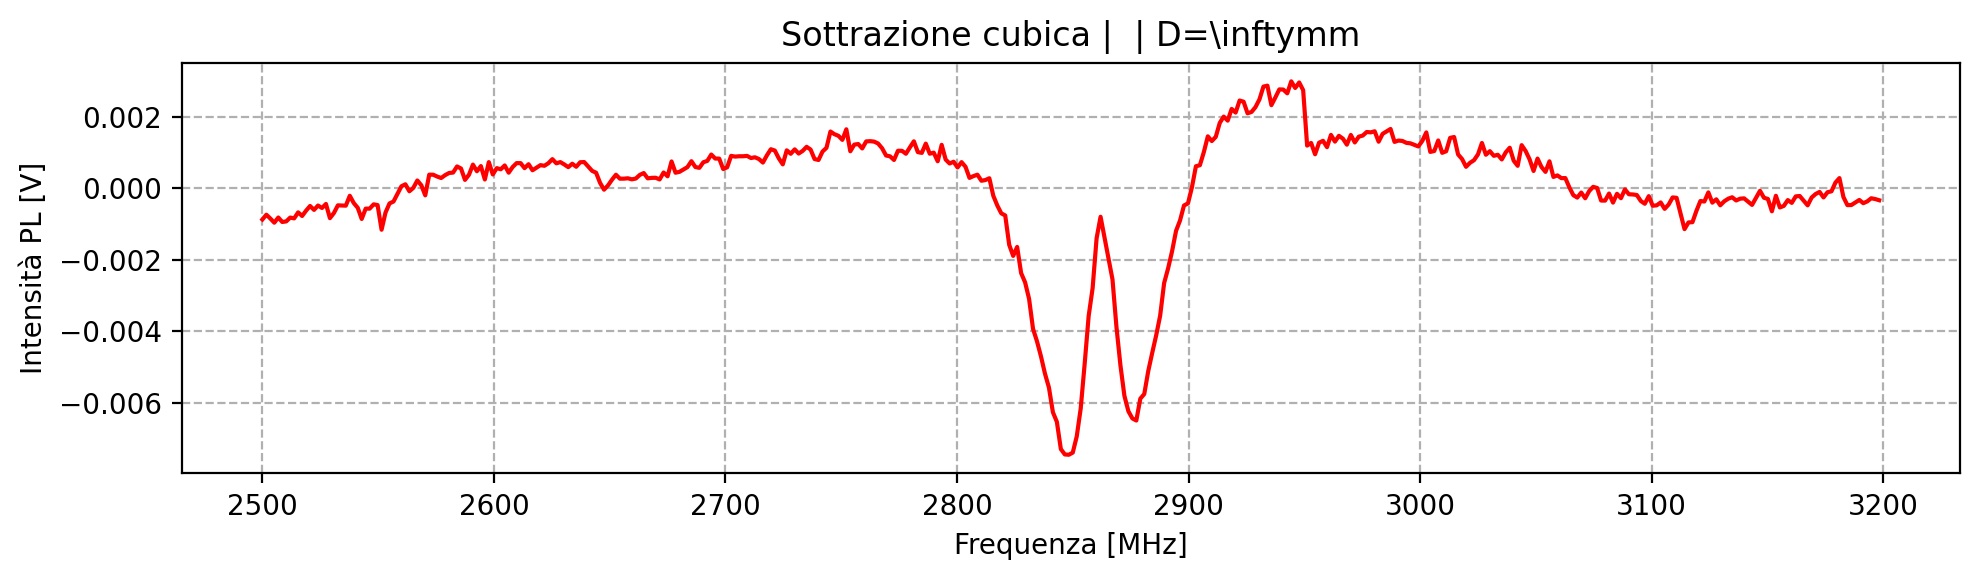

FUNZIONE DI FIT: cub_func
PARAMETRI FIT: [-6.95420260e-11  6.64595885e-07 -2.08803523e-03  3.69510599e+00]


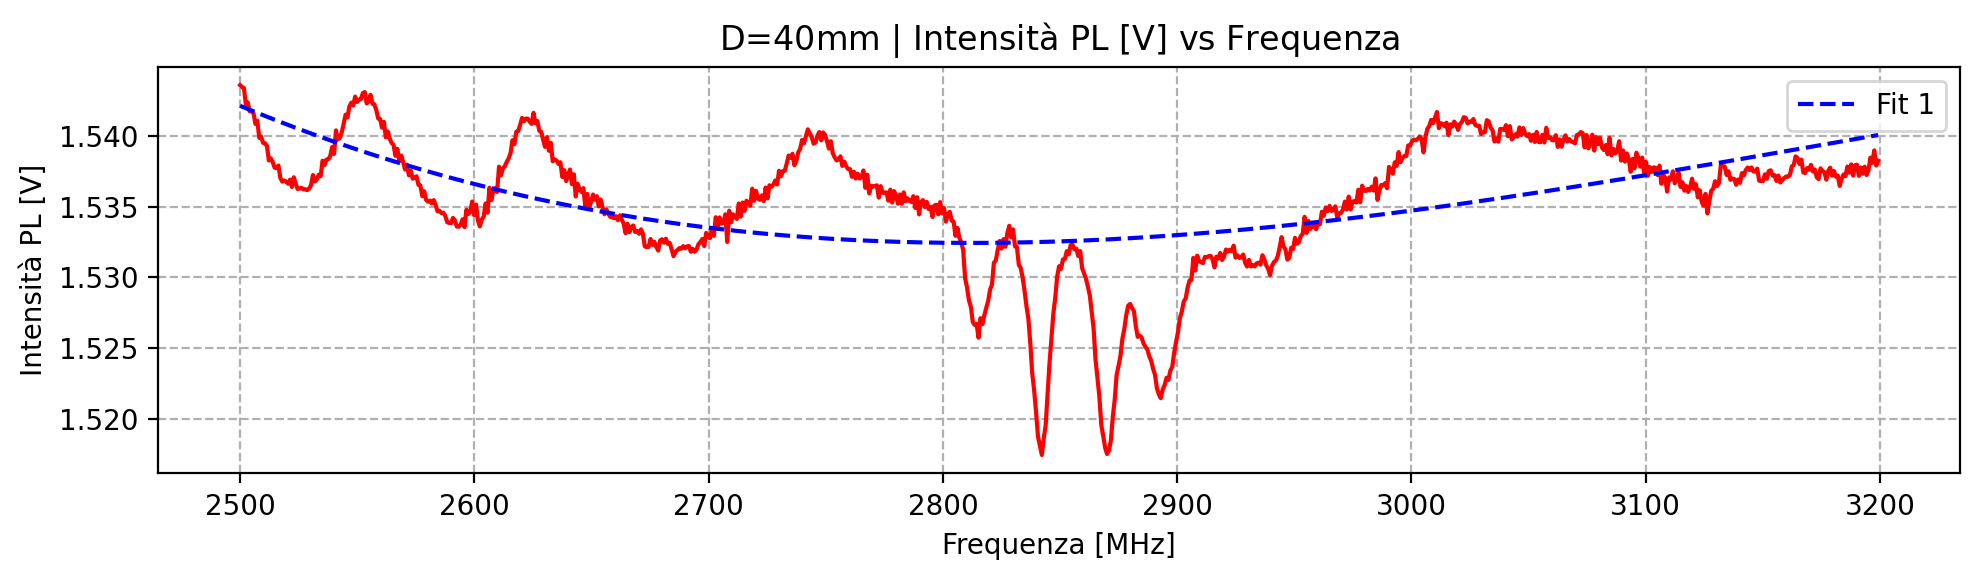

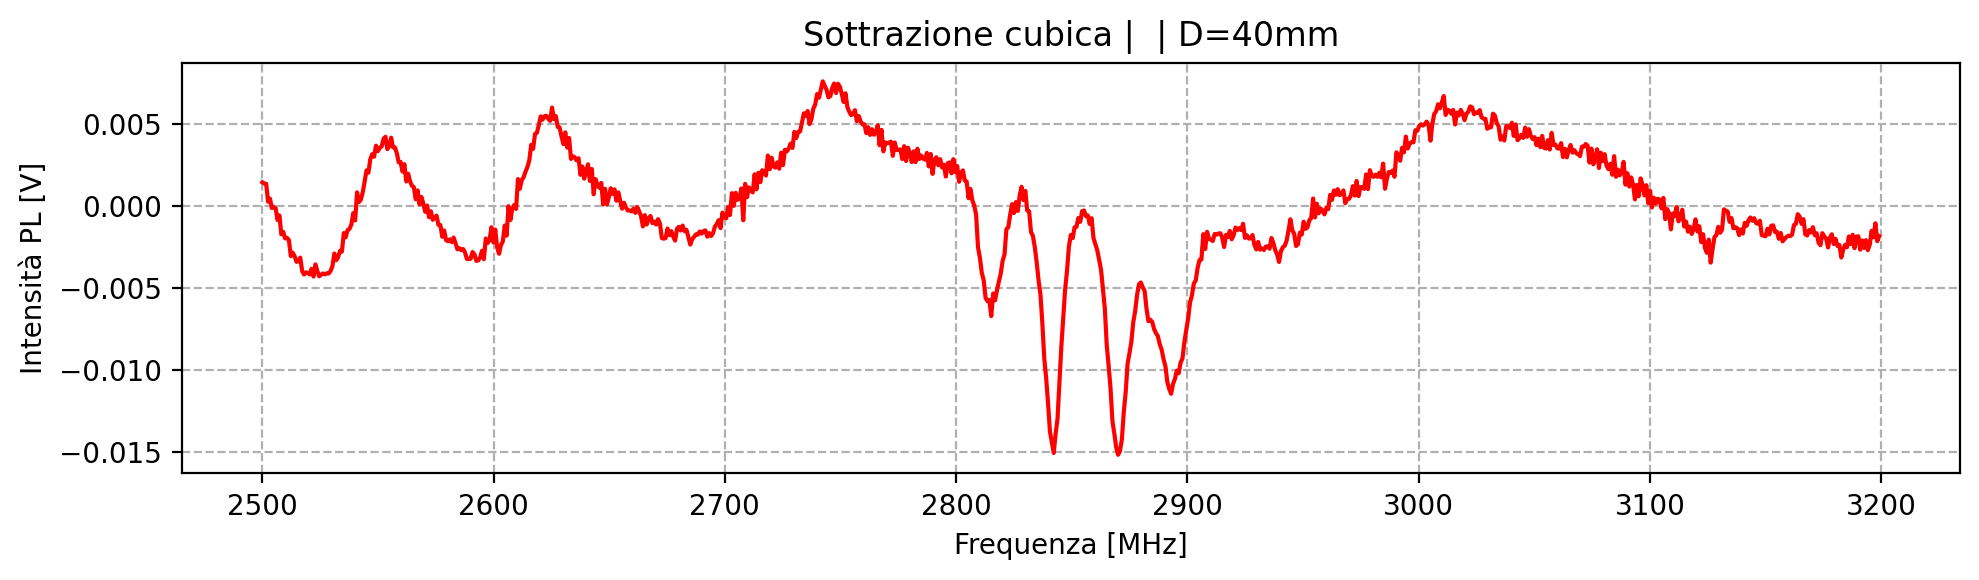

FUNZIONE DI FIT: cub_func
PARAMETRI FIT: [ 1.72040688e-10 -1.49524622e-06  4.33059066e-03 -2.89609750e+00]


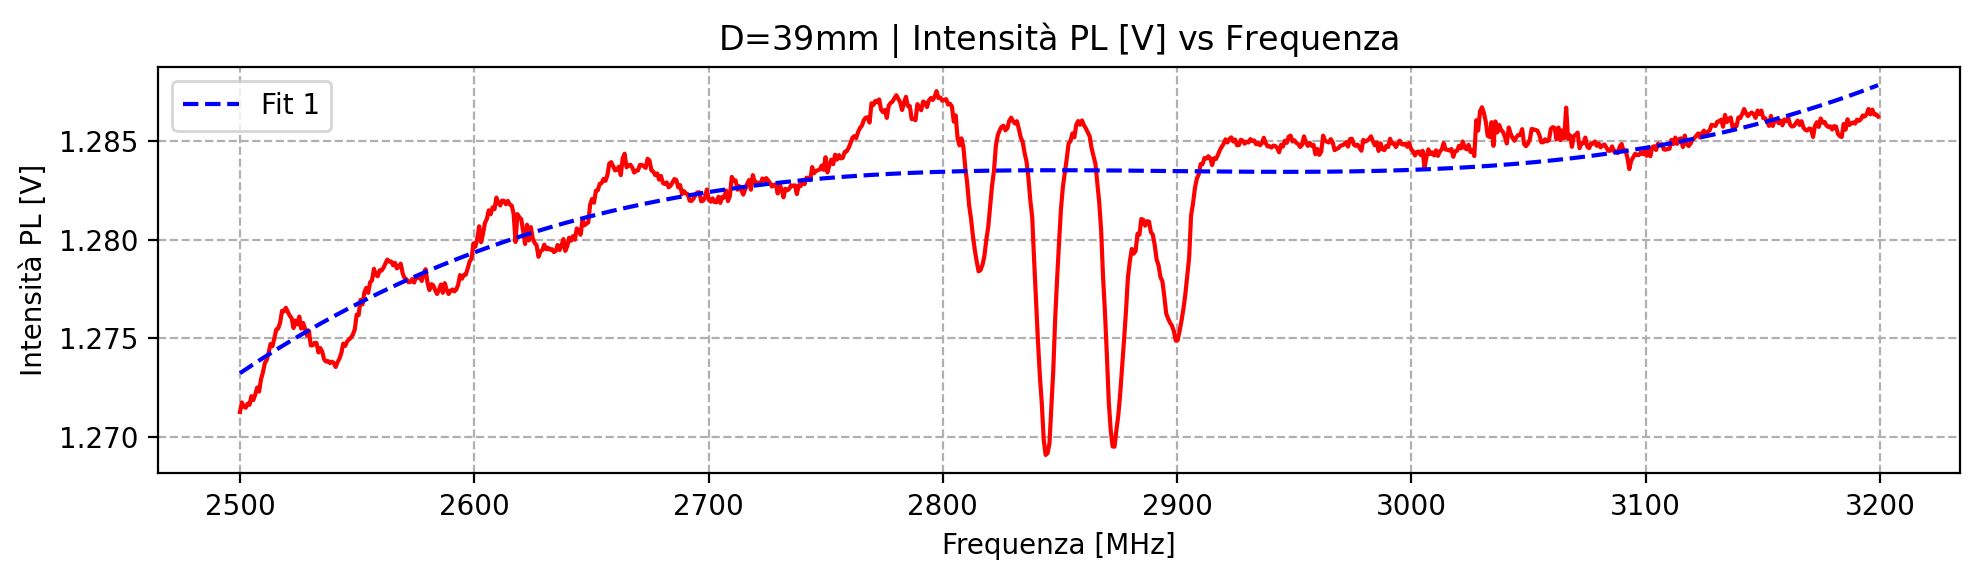

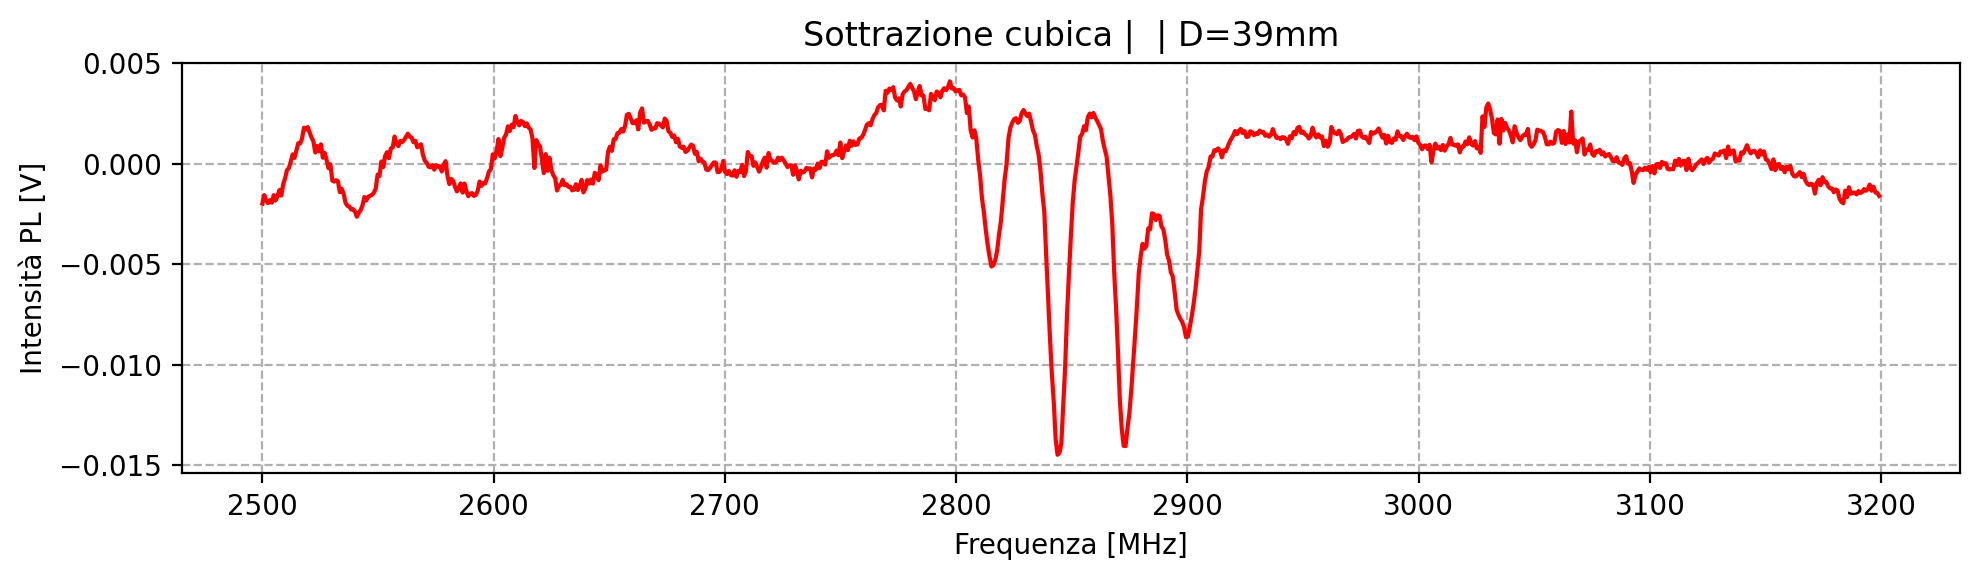

FUNZIONE DI FIT: cub_func
PARAMETRI FIT: [ 4.09230861e-11 -3.24476978e-07  8.50446655e-04  3.58003453e-01]


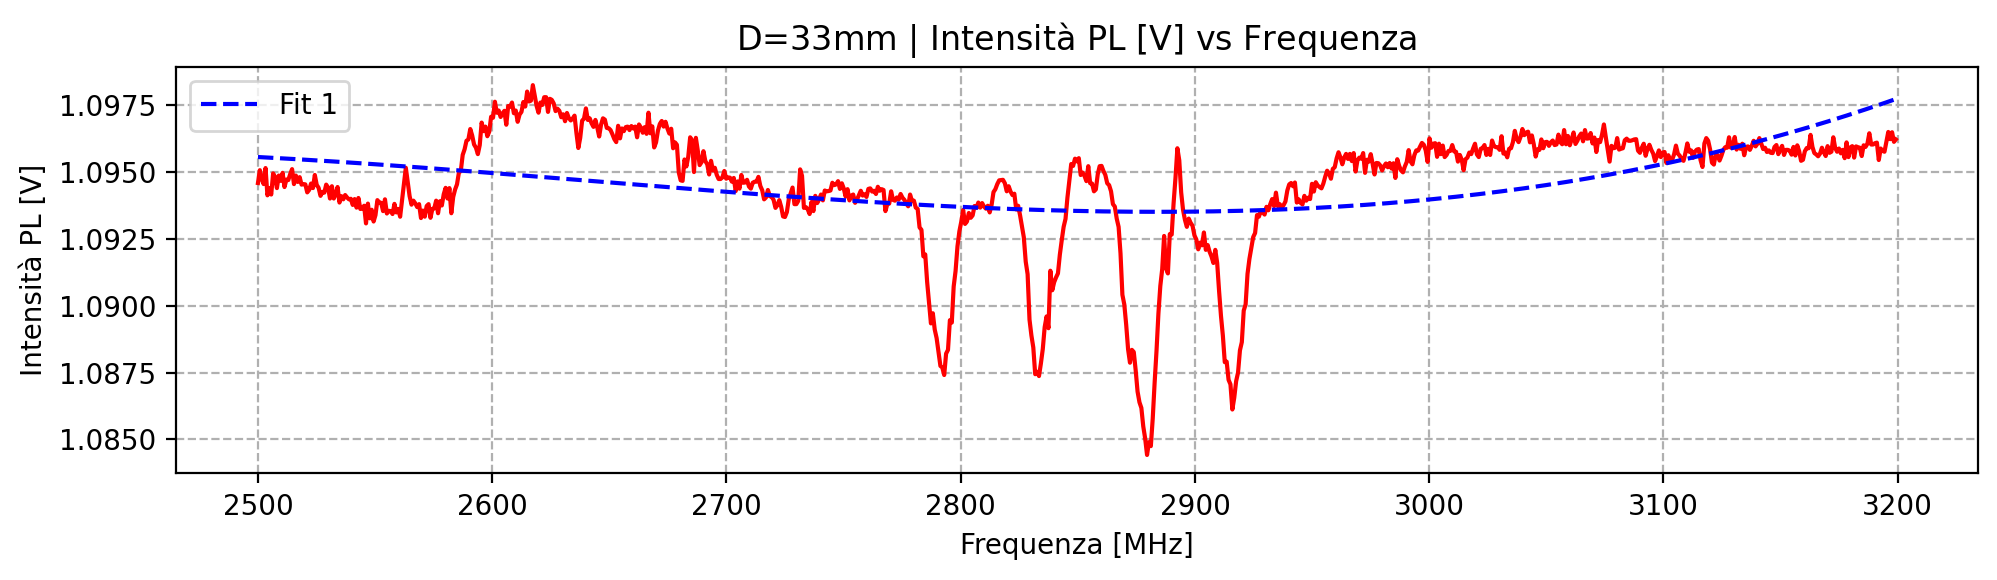

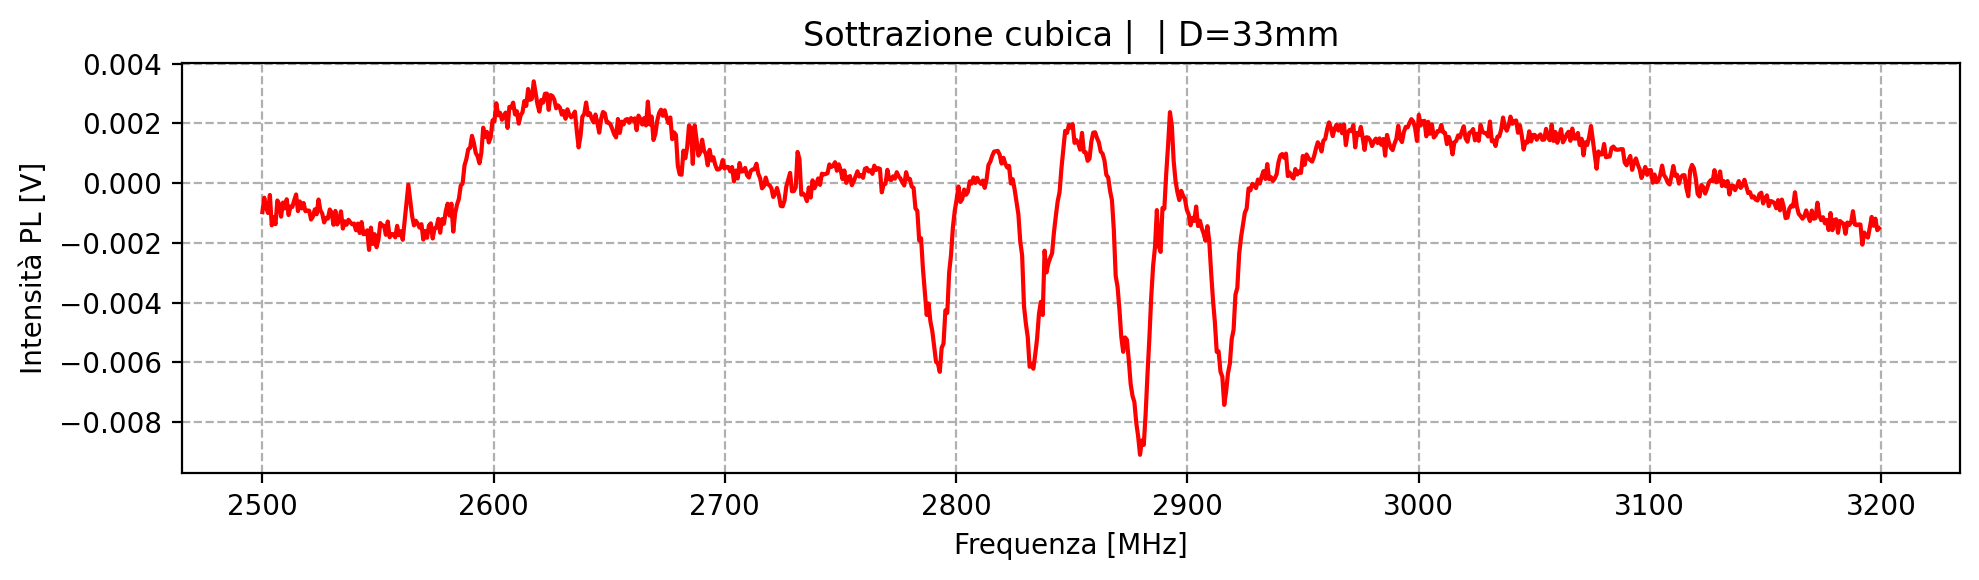

FUNZIONE DI FIT: cub_func
PARAMETRI FIT: [ 1.73363610e-10 -1.47588683e-06  4.18737511e-03 -2.78570160e+00]


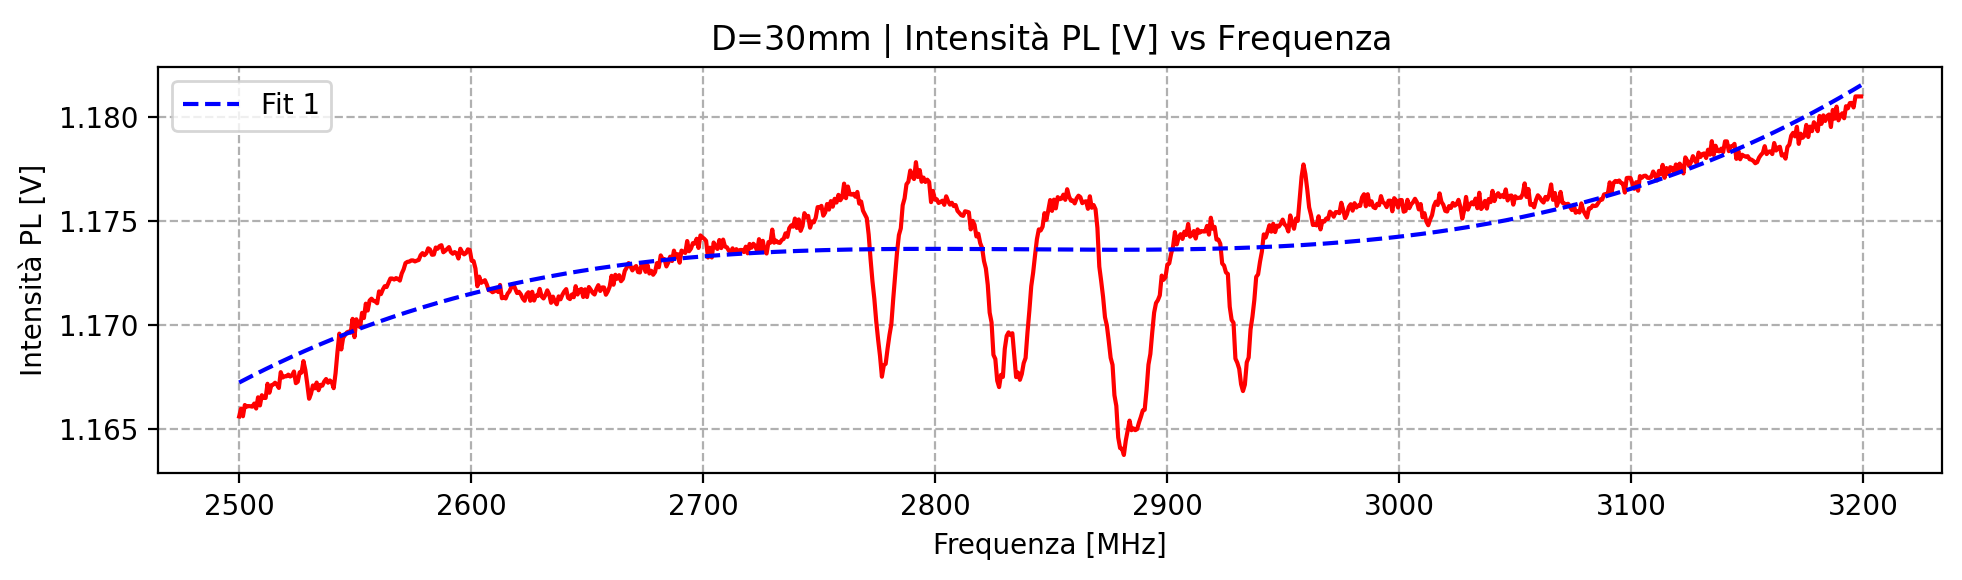

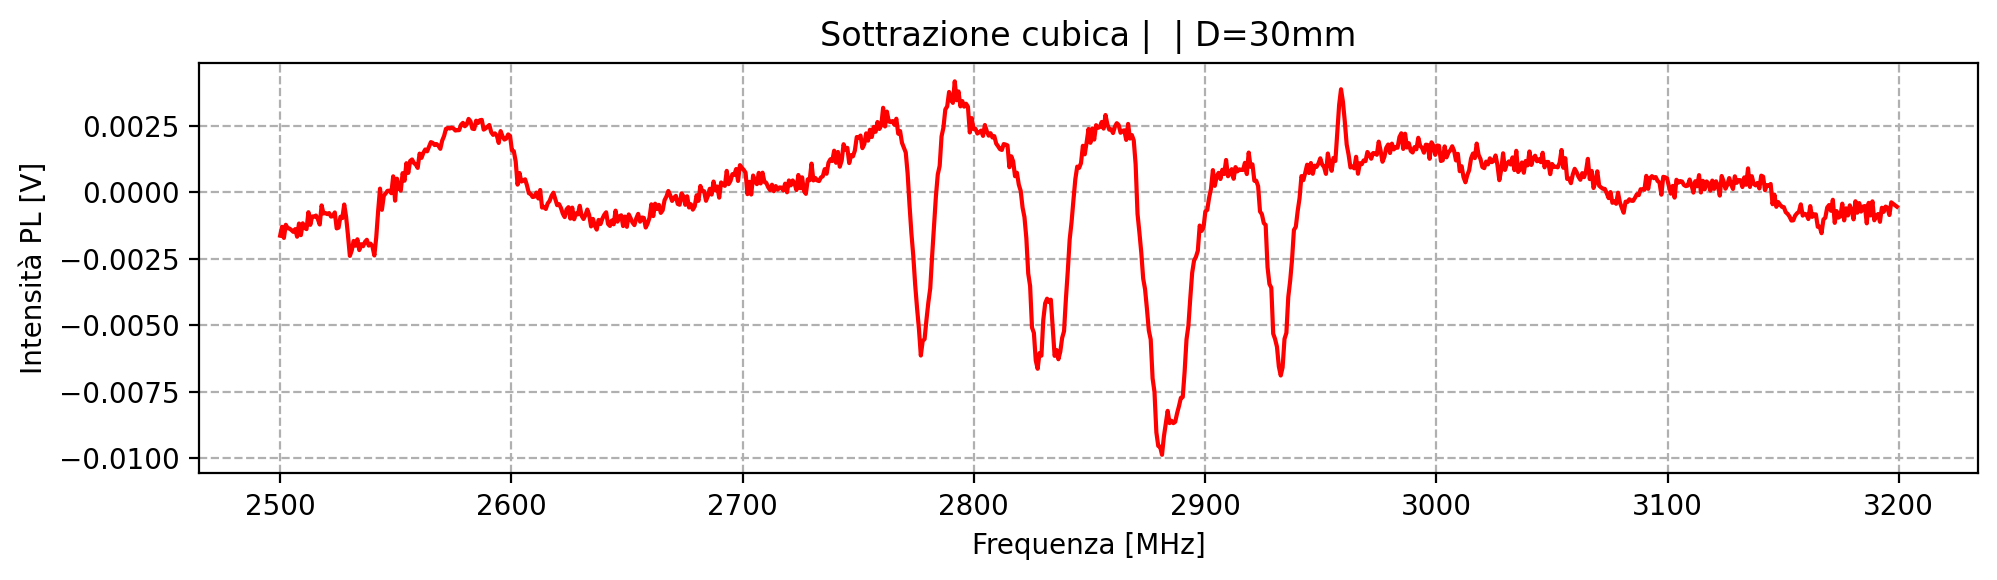

FUNZIONE DI FIT: cub_func
PARAMETRI FIT: [-5.21284503e-12  3.26637759e-08 -4.63647922e-05  1.24492232e+00]


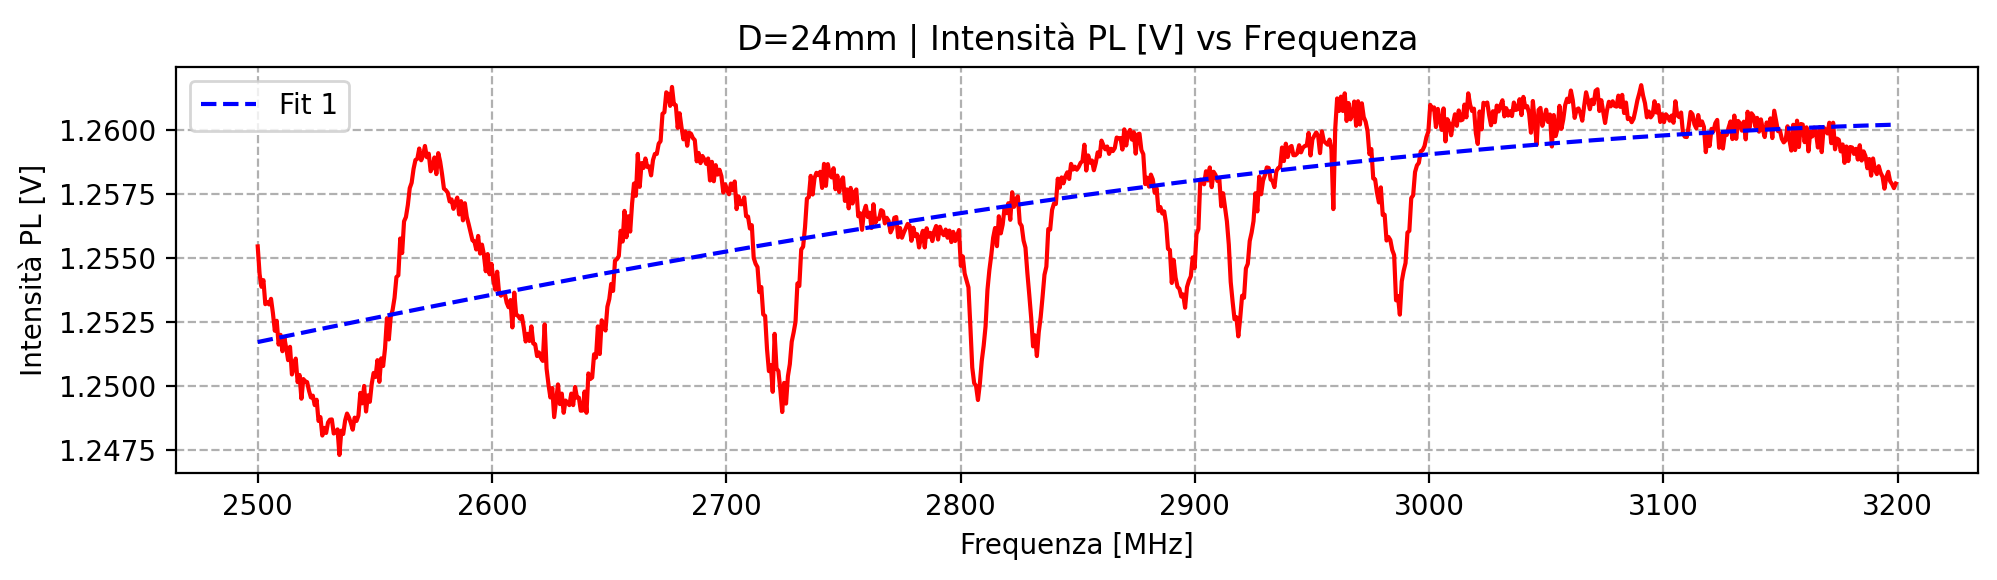

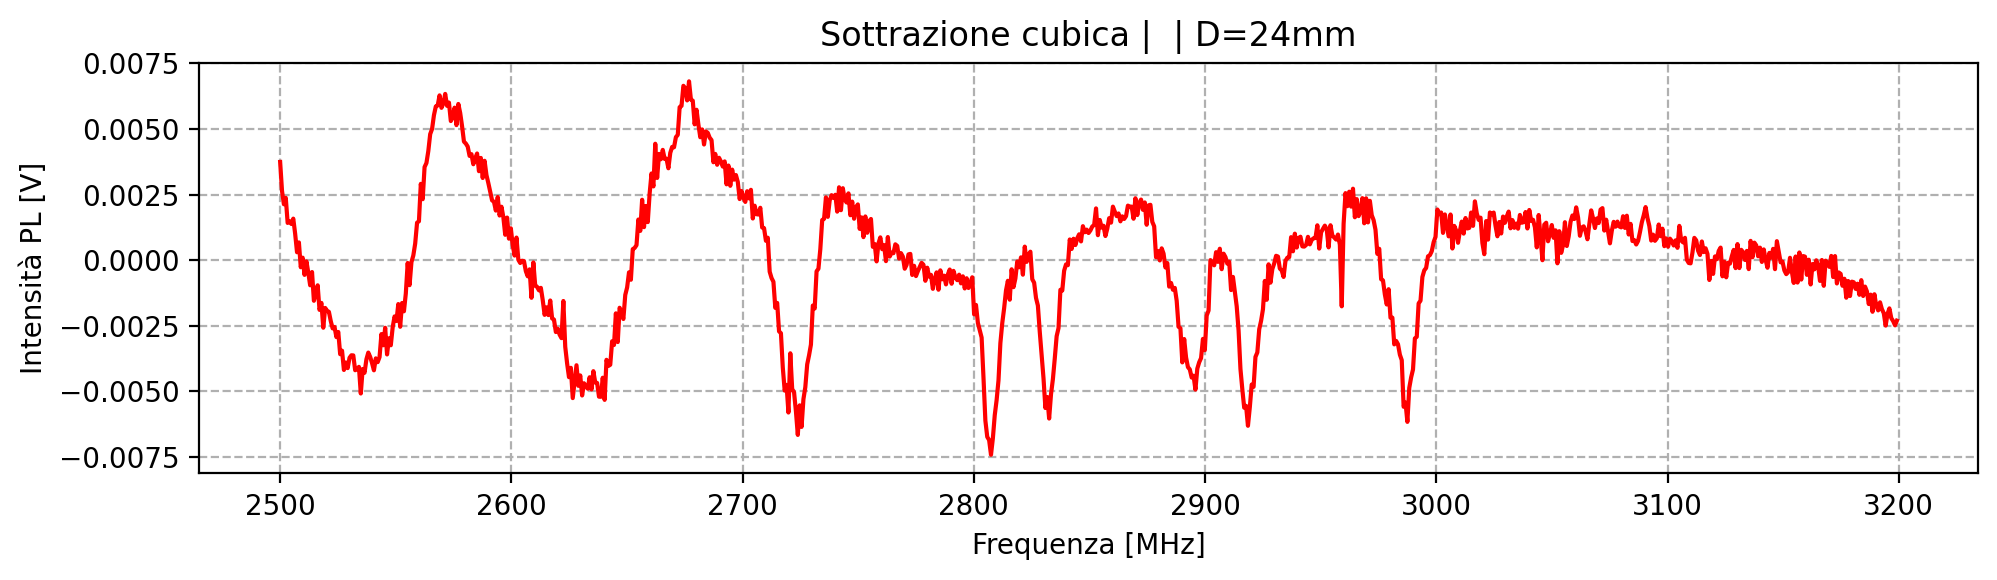

FUNZIONE DI FIT: cub_func
PARAMETRI FIT: [-7.84739581e-11  7.19333379e-07 -2.14296235e-03  3.96020913e+00]


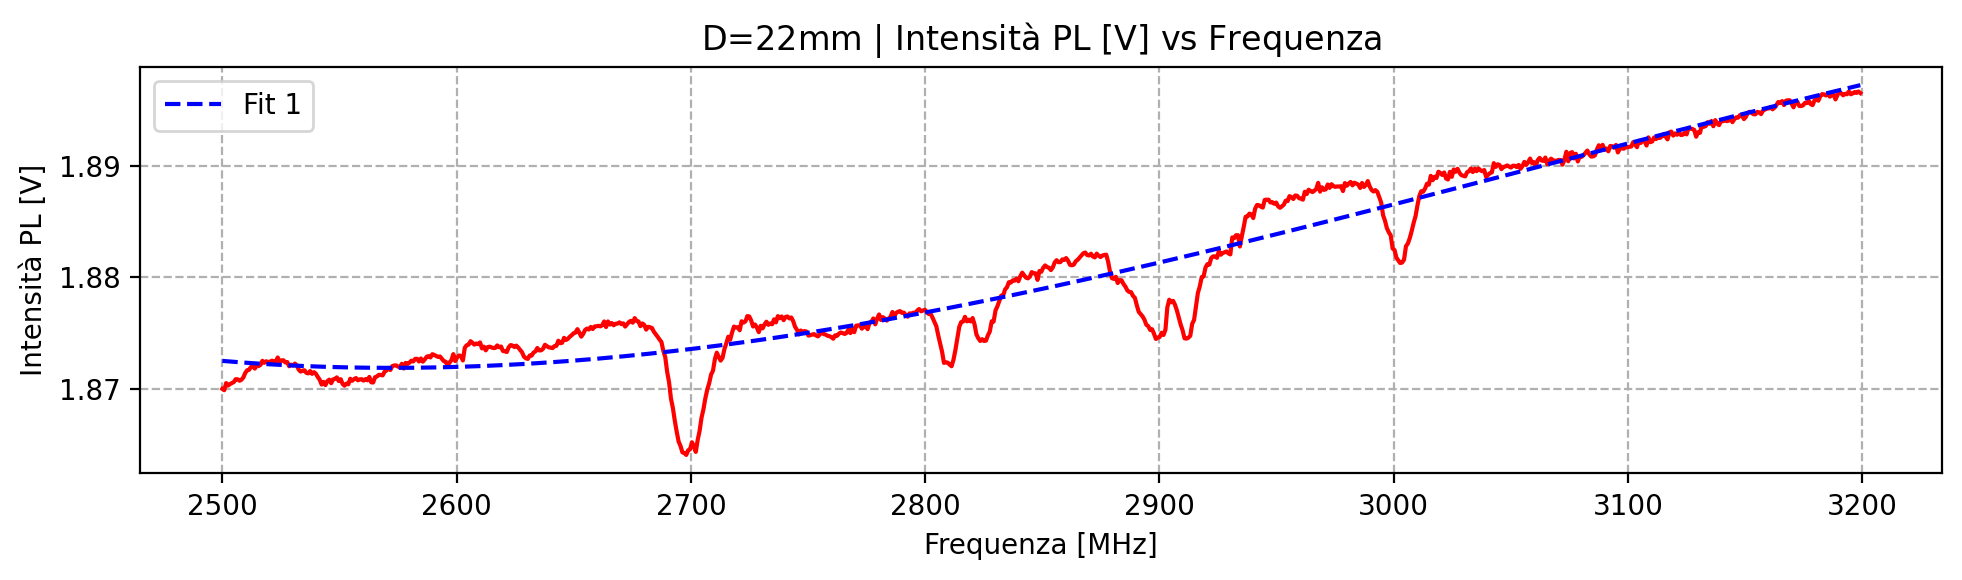

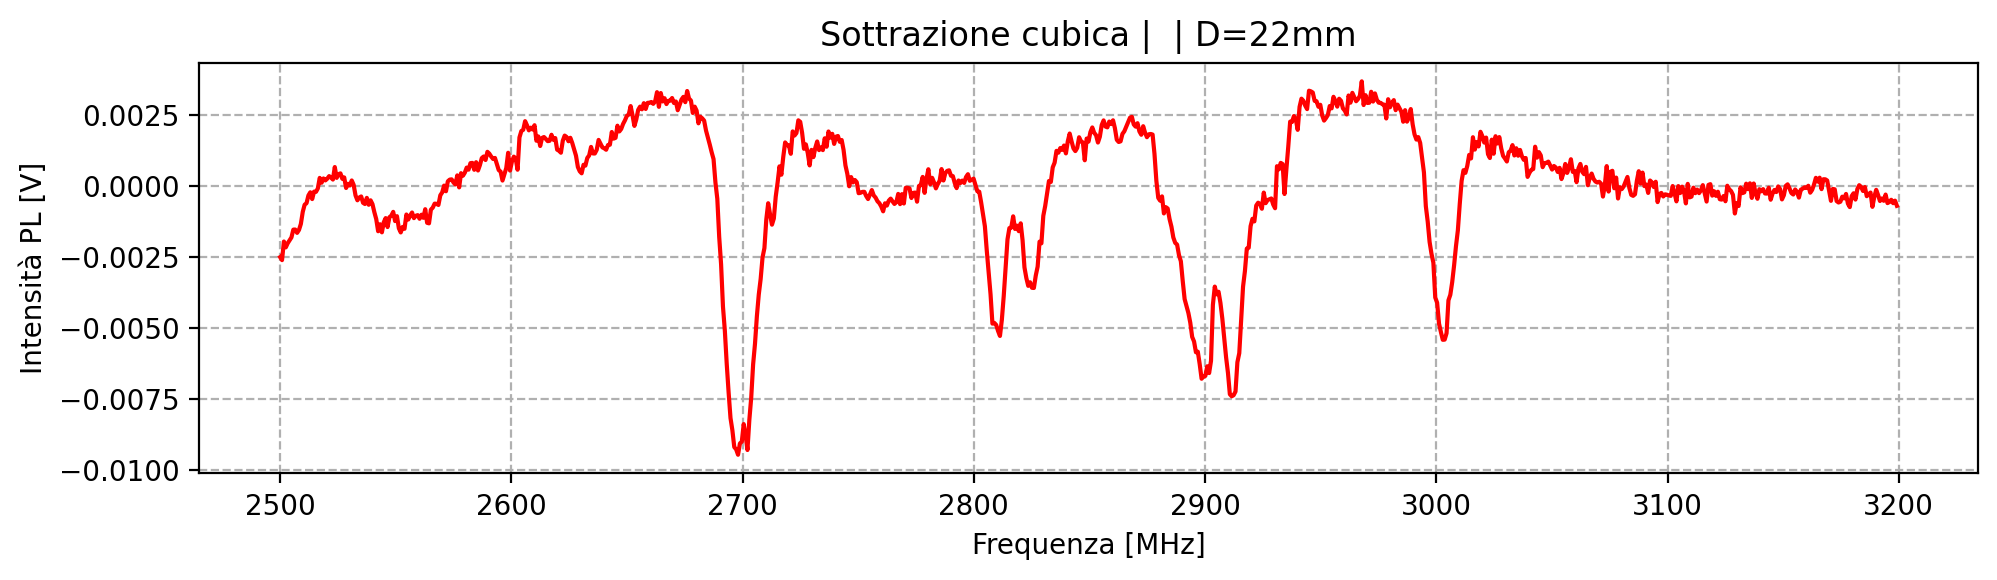

FUNZIONE DI FIT: cub_func
PARAMETRI FIT: [ 6.08034684e-11 -5.99565339e-07  1.95917916e-03 -7.91459490e-01]


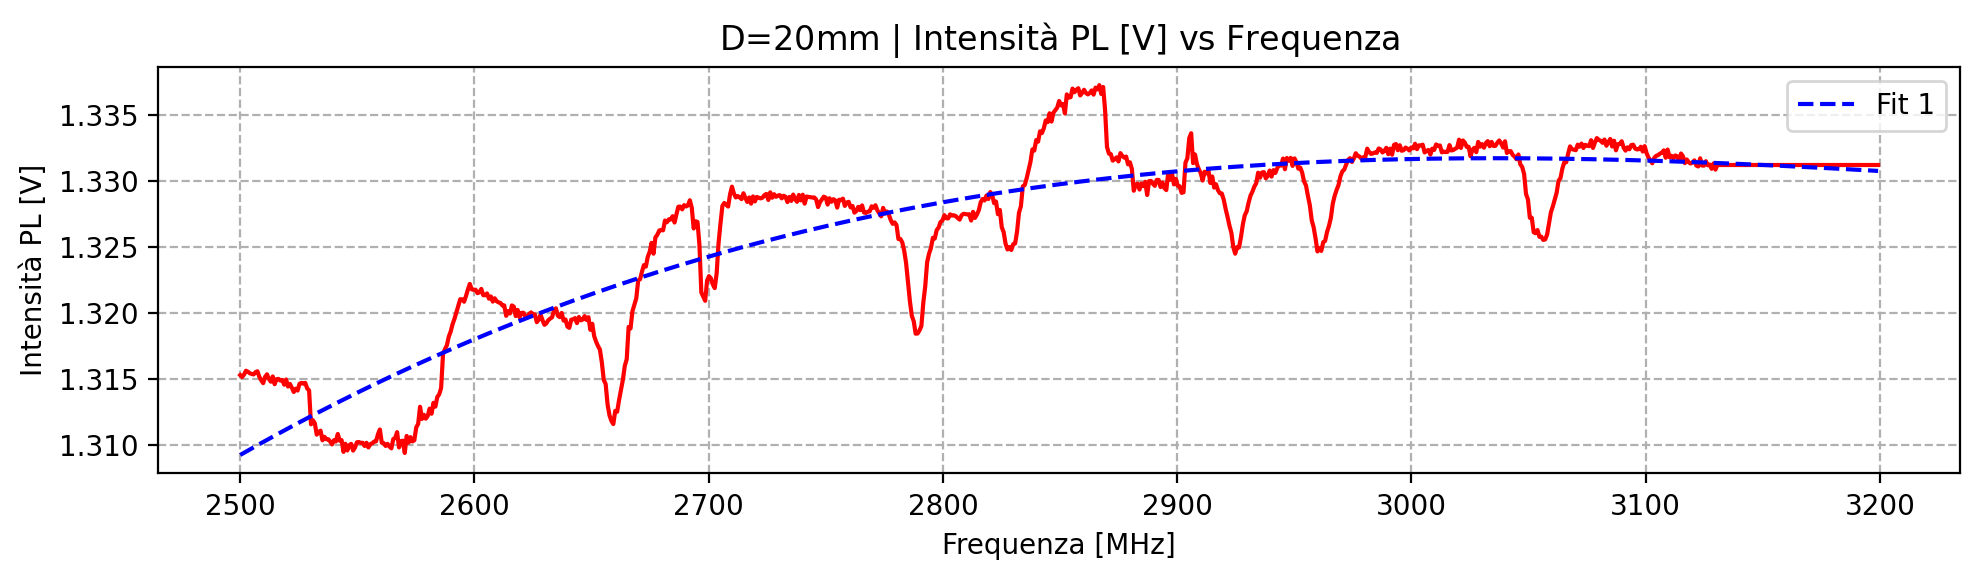

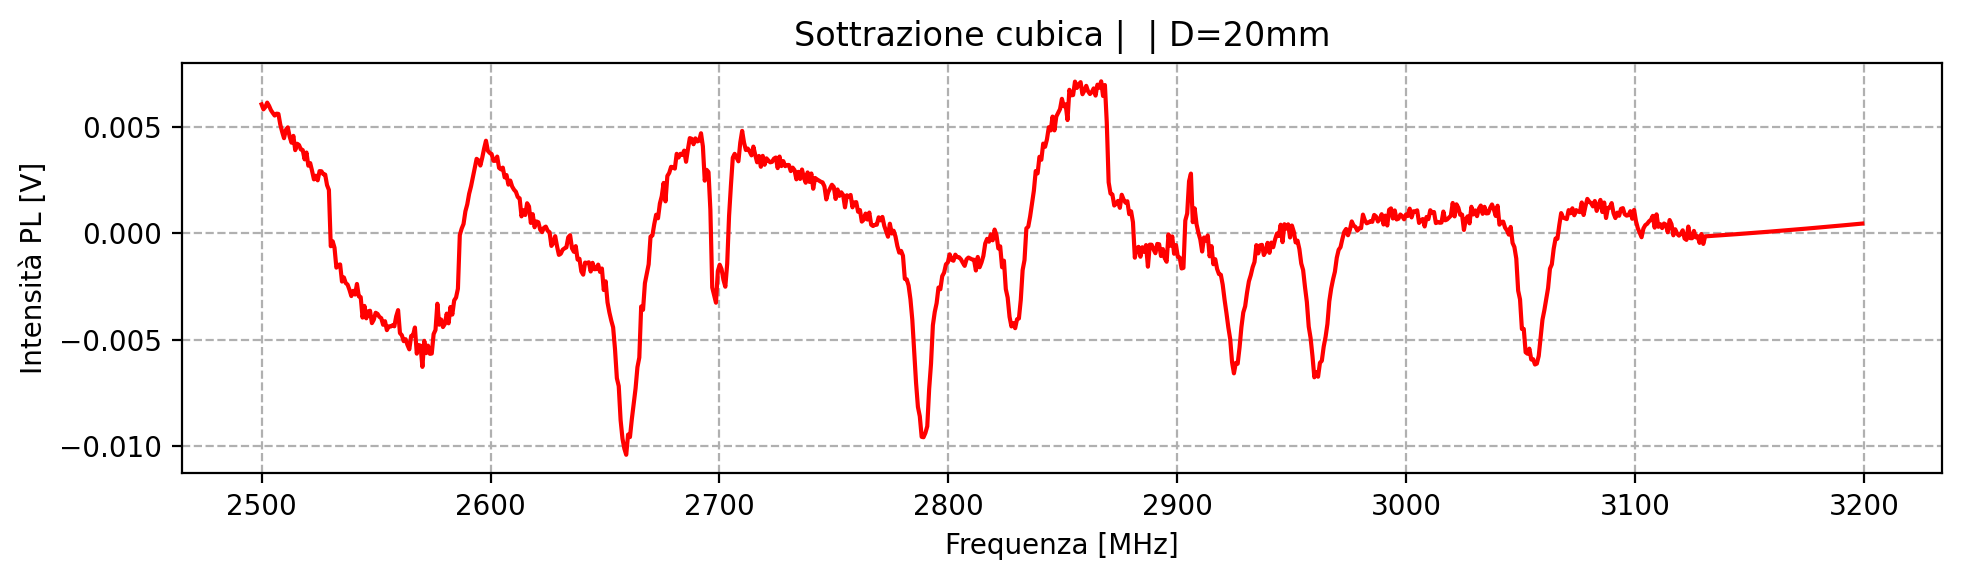

FUNZIONE DI FIT: cub_func
PARAMETRI FIT: [ 4.46584509e-11 -3.45710002e-07  8.78514026e-04  3.09648389e-01]


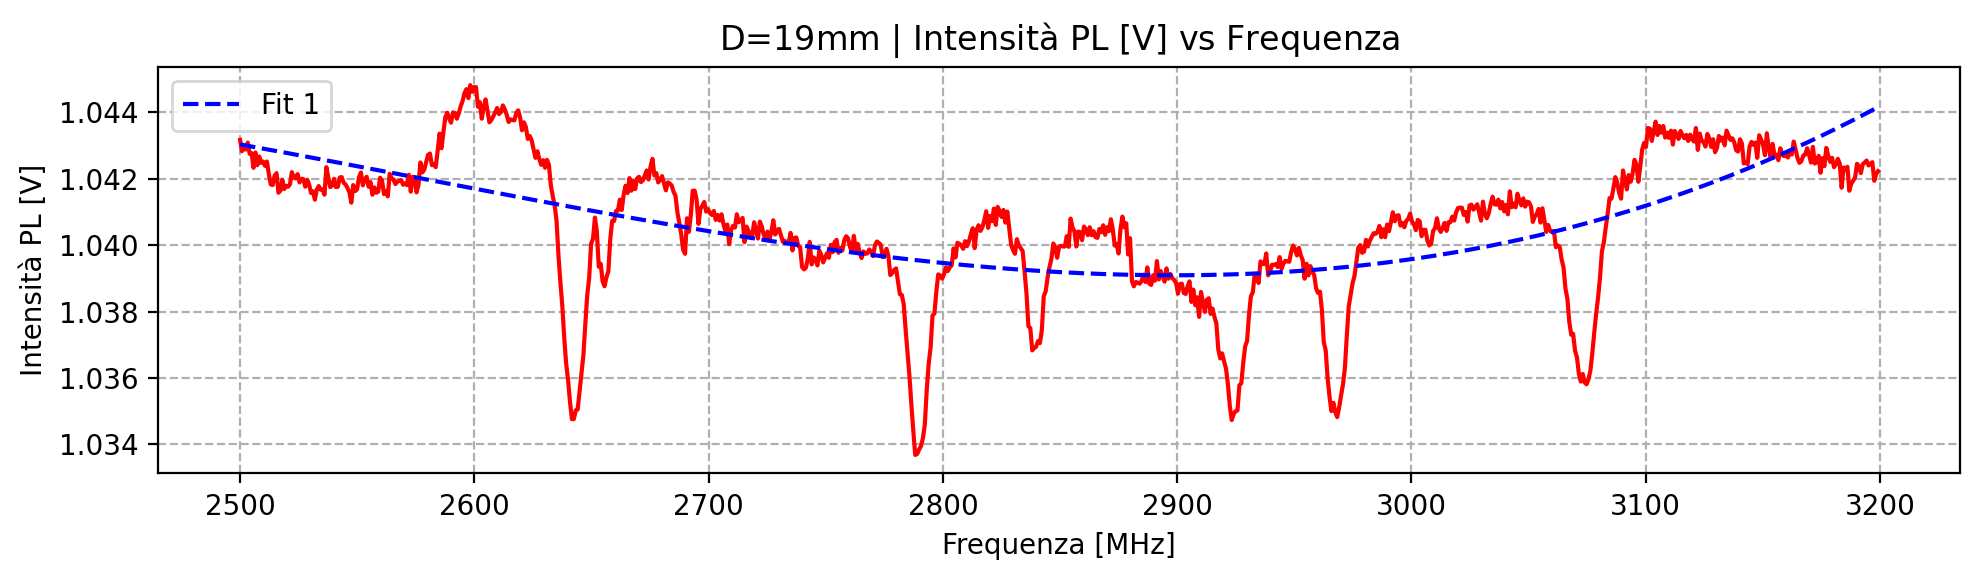

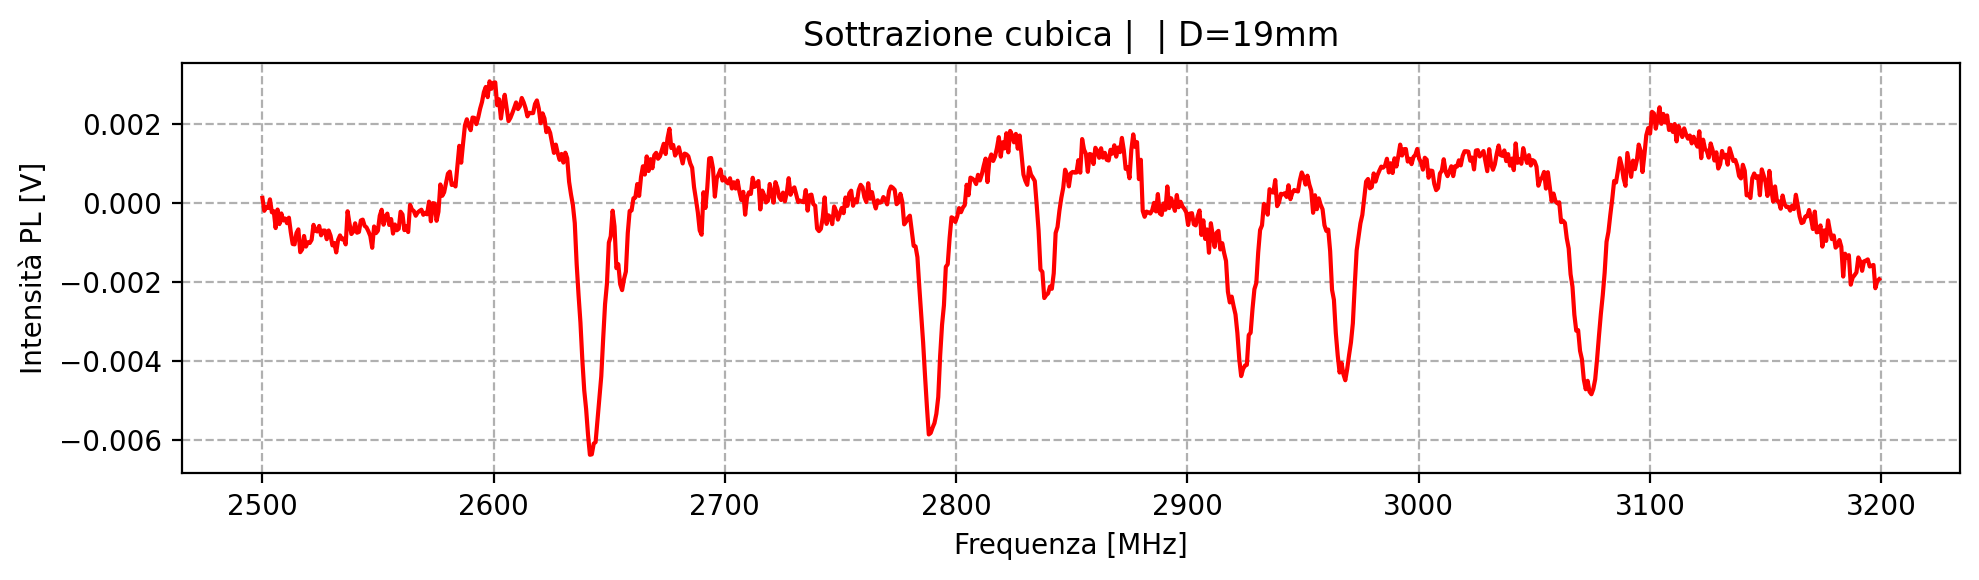

FUNZIONE DI FIT: cub_func
PARAMETRI FIT: [-1.22764609e-10  1.09550841e-06 -3.22999103e-03  4.38812854e+00]


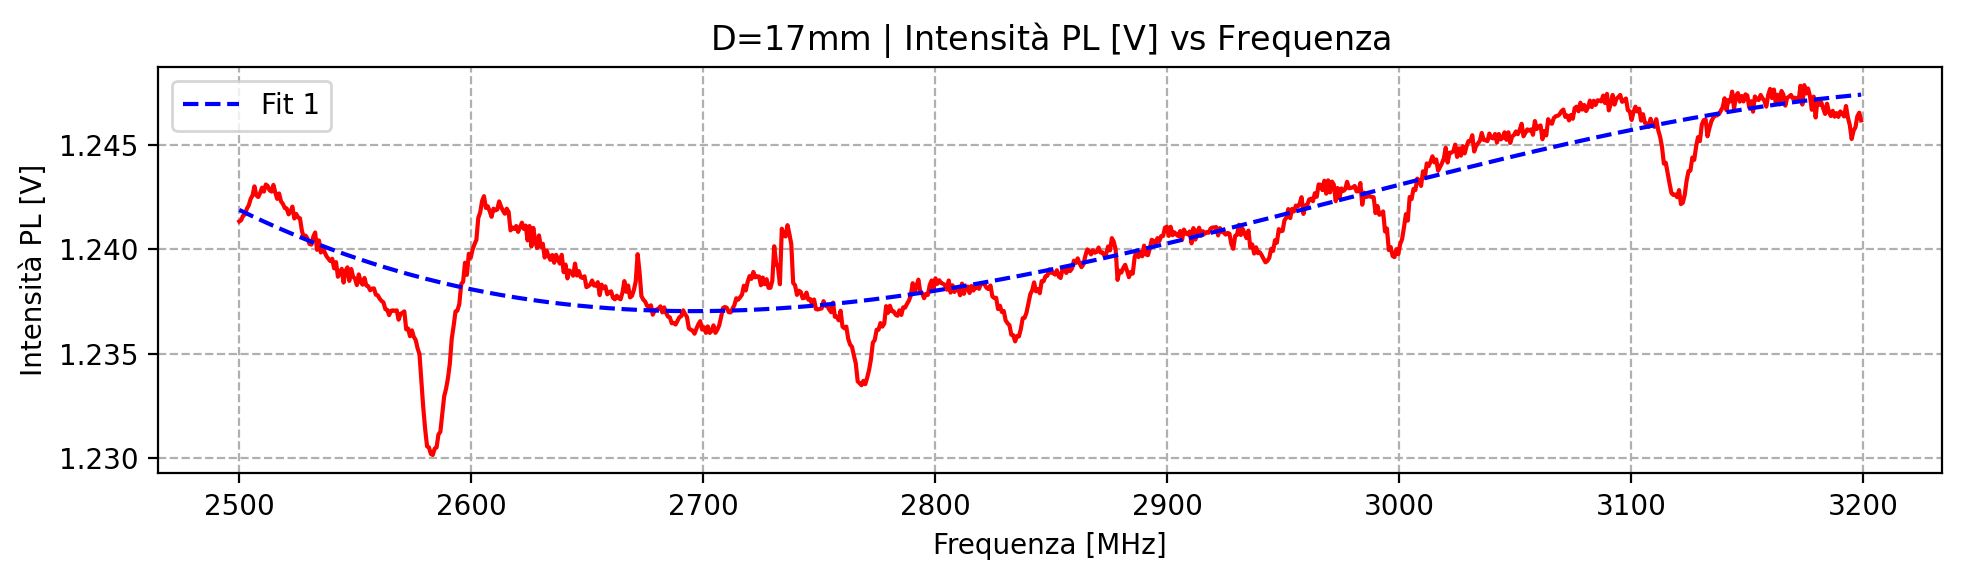

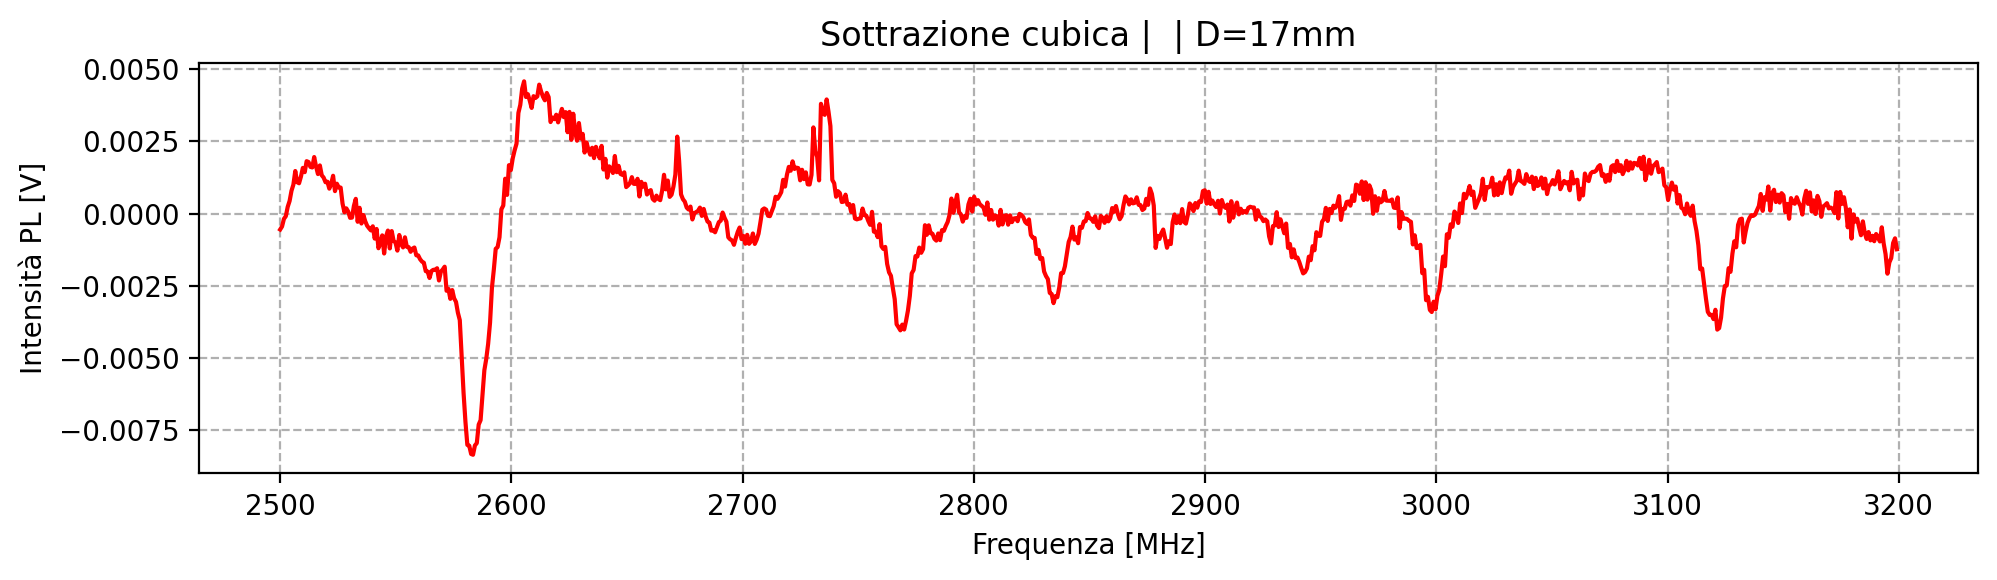

In [312]:
for i, dist in enumerate( reversed(distanze) ):
    
    spettro = spettri[i]
    
    # 1: polinomio su tutto lo spettro #
    # questo è il primo fit del background, fatto con una cubica
    popt0, fit_curve0 = fit_sin_odmr(spettro, 'od', fit_func=cub_func)
    
    # vediamo come fitta:
    plot_odmr(spettro, 'od', dist=dist, fit_curves=[fit_curve0])
    
    # sottraiamo il background (cubica)
    remove_background(spettro, 'od', fit_curve=fit_curve0, fit_func=cub_func, popt=popt0)
    # vediamo come è cambiato lo spettro
    plot_odmr(spettro, 'od', dist=dist, title='Sottrazione cubica | ')
    
    # 2: sinusoide smorzata su tutto lo spettro #
    '''
    # poi in realtà la prima regione a sx sembra un po' sinusoidale
    sin_p0 = [-0.005, 25, 0.2, 2500, 0.001, 0.007]
    popt1, fit_curve1 = fit_sin_odmr(spettro, 'od', fit_func=sin_var_func, region=vec_regione_sx[i], p0=sin_p0)
    popt2, fit_curve2 = fit_sin_odmr(spettro, 'od', fit_func=sin_var_func, p0=popt1)
    
    # vediamo come fitta:
    plot_odmr(spettro, 'od', dist=dist, fit_curves=[fit_curve1, fit_curve2], title='Background sinusoidale | ')
    # sottraiamo il background
    remove_background(spettro, 'od', fit_curve=fit_curve2, fit_func=sin_var_func, popt=popt2)
    # vediamo come è cambiato lo spettro
    plot_odmr(spettro, 'od', dist=dist, title='Sottrazione sinusoide | ')
    
    # 3: quello che resta! # #boh... un seno quadro forse?
    popt3, fit_curve3 = fit_sin_odmr(spettro, 'od', fit_func=sin_quadro_var_func, region=vec_regione_sx[i], p0=sin_p0)
    popt4, fit_curve4 = fit_sin_odmr(spettro, 'od', fit_func=sin_quadro_var_func, p0=popt1)
    
    # vediamo come fitta:
    plot_odmr(spettro, 'od', dist=dist, fit_curves=[fit_curve3, fit_curve4], title='Background sinusoidale quadro | ')
    # sottraiamo il background
    remove_background(spettro, 'od', fit_curve=fit_curve3, fit_func=sin_quadro_var_func, popt=popt3, regione=vec_regione_sx[i])
    # vediamo come è cambiato lo spettro
    plot_odmr(spettro, 'od', dist=dist, title='Sottrazione seno quadro | ')
    
    # 4: quello che rimane a destra! #
    popt5, fit_curve5 = fit_sin_odmr(spettro, 'od', fit_func=cub_func, region=vec_regione_dx[i])
    
    # vediamo come fitta:
    plot_odmr(spettro, 'od', dist=dist, fit_curves=[fit_curve5])
    
    # sottraiamo il background
    remove_background(spettro, 'od', fit_curve=fit_curve5, fit_func=cub_func, popt=popt5, regione=vec_regione_dx[i])
    # vediamo come è cambiato lo spettro
    plot_odmr(spettro, 'od', dist=dist, title='Sottrazione cubica a DX | ')
    '''

### Normalizzazione

Estremamente poco efficiente ciclare quattro volte, lo so, ma è la correzione più semplice a cui ho pensato. Già che ci sono normalizzo anche il segnale lock-in.

In [313]:
minimo_assoluto = 1000
minimo_assoluto_lockin = 1000

for i, dist in enumerate( reversed(distanze) ):
    
    min_provvisorio = np.min(spettri[i]['od'])
    min_provvisorio_lockin = np.min(spettri[i]['lock'])
    
    if min_provvisorio < minimo_assoluto: minimo_assoluto = min_provvisorio
    if min_provvisorio_lockin < minimo_assoluto_lockin: minimo_assoluto_lockin = min_provvisorio_lockin
    
# normalizzo tutti gli spettri al minimo assoluto
for i in range(len(spettri)):
    spettri[i]['od'] = spettri[i]['od'] / np.abs(minimo_assoluto)
    spettri[i]['lock'] = spettri[i]['lock'] / np.abs(minimo_assoluto_lockin)

### Salvataggio

In [314]:
# Salvo nella cartella "data/cristallo2_aligned_cleaned/" gli spettri trattati in precedenza. Un file per ogni valore di distanza. Ciascun file con tre colonne: freq |  od  | lock

for i, dist in enumerate( reversed(distanze) ):
    # Crea il nome del file di output
    nome_file = f"data/cristallo2_aligned_cleaned/odmr_dist_{dist}_cleaned.csv"
    # Apri il file in modalità scrittura
    with open(nome_file, 'w') as f:
        # Scrivi l'intestazione con separatori |
        f.write("  freq    |   ref    |    od    |   lock   \n")
        f.write("----------+----------+----------+----------\n")
        
        # Scrivi i dati riga per riga con formattazione allineata
        for j in range(len(spettri[i]['freq'])):
            f.write(f"{spettri[i]['freq'][j]:9.3f} | {spettri[i]['ref'][j]:8.5f} | {spettri[i]['od'][j]:8.5f} | {spettri[i]['lock'][j]:8.5f}\n")

    print(f"Dati salvati nel file: {nome_file}")

Dati salvati nel file: data/cristallo2_aligned_cleaned/odmr_dist_1000_cleaned.csv
Dati salvati nel file: data/cristallo2_aligned_cleaned/odmr_dist_40_cleaned.csv
Dati salvati nel file: data/cristallo2_aligned_cleaned/odmr_dist_39_cleaned.csv
Dati salvati nel file: data/cristallo2_aligned_cleaned/odmr_dist_33_cleaned.csv
Dati salvati nel file: data/cristallo2_aligned_cleaned/odmr_dist_30_cleaned.csv
Dati salvati nel file: data/cristallo2_aligned_cleaned/odmr_dist_24_cleaned.csv
Dati salvati nel file: data/cristallo2_aligned_cleaned/odmr_dist_22_cleaned.csv
Dati salvati nel file: data/cristallo2_aligned_cleaned/odmr_dist_20_cleaned.csv
Dati salvati nel file: data/cristallo2_aligned_cleaned/odmr_dist_19_cleaned.csv
Dati salvati nel file: data/cristallo2_aligned_cleaned/odmr_dist_17_cleaned.csv


## FIT LORENTZIANO

In [315]:
# Avevo fatto un errore nel plot delle frequenze e me lo sono trascinato. Introduco un termine di shift.
fattore = 700/214
def shifta(val):
    delta_0 = val - 2500
    return 2500 + delta_0 * fattore
    

Ora fitto con lorentziana+background lineare. Uso una singola funzione per ciascun deep; forse nei primi spettri sarebbe meglio usare somma di lorentziane. Per fittare sicuramente serve dichiarare prima quanti deep cercare in ciascun spettro e dove cercarli. 

In [316]:
Num_of_deeps = [2, 4, 4, 4, 6, 6, 6, 6, 6, 6]
Central_regions = [
    [2585, 2625],
    [2585, 2630],
    [2580, 2635],
    [2575, 2640],
    [2575, 2640],
    [2560, 2665],
    [2550, 2665],
    [2540, 2680],
    [2530, 2680],
    [2515, 2695]
]
for reg in Central_regions:
    for i in (0,1):
        reg[i] = shifta(reg[i]) 

Sarebbe opportuno anche dargli indicativamente il centro di ciascun deep. Questo è un lavoro terribile.

In [317]:
Centers = [
    [2600, 2610], # 2 - INF
    [2595, 2605, 2615, 2625], # 4 - 40
    [2595, 2605, 2615, 2625], # 4 - 39
    [2590, 2600, 2620, 2630], # 4 - 33
    [2580, 2600, 2605, 2615, 2620, 2630], # prima 4, poi 6 - 30 [ho aggiunto 2605 e 2620]
    [2570, 2590, 2605, 2620, 2630, 2650], # 6 - 24 
    [2560, 2595, 2600, 2620, 2630, 2655], # 6 - 22
    [2550, 2585, 2600, 2630, 2640, 2670], # 6 - 20
    [2545, 2585, 2605, 2630, 2645, 2675], # 6 - 19
    [2525, 2580, 2605, 2635, 2650, 2690], # 6 - 17
]
for arr in Centers: 
    for i in range(len(arr)):
        arr[i] = shifta(arr[i])

Raccolgo i centri dei deep trovati in un dict. Le key saranno le distanze.

In [318]:
fit_results = {}

Fit insieme:
0. A=0.5547184528260413, gamma=12.734507559854734, nu0=2844.556303702735
1. A=0.4664265129169298, gamma=9.202695759660438, nu0=2879.0042323433336


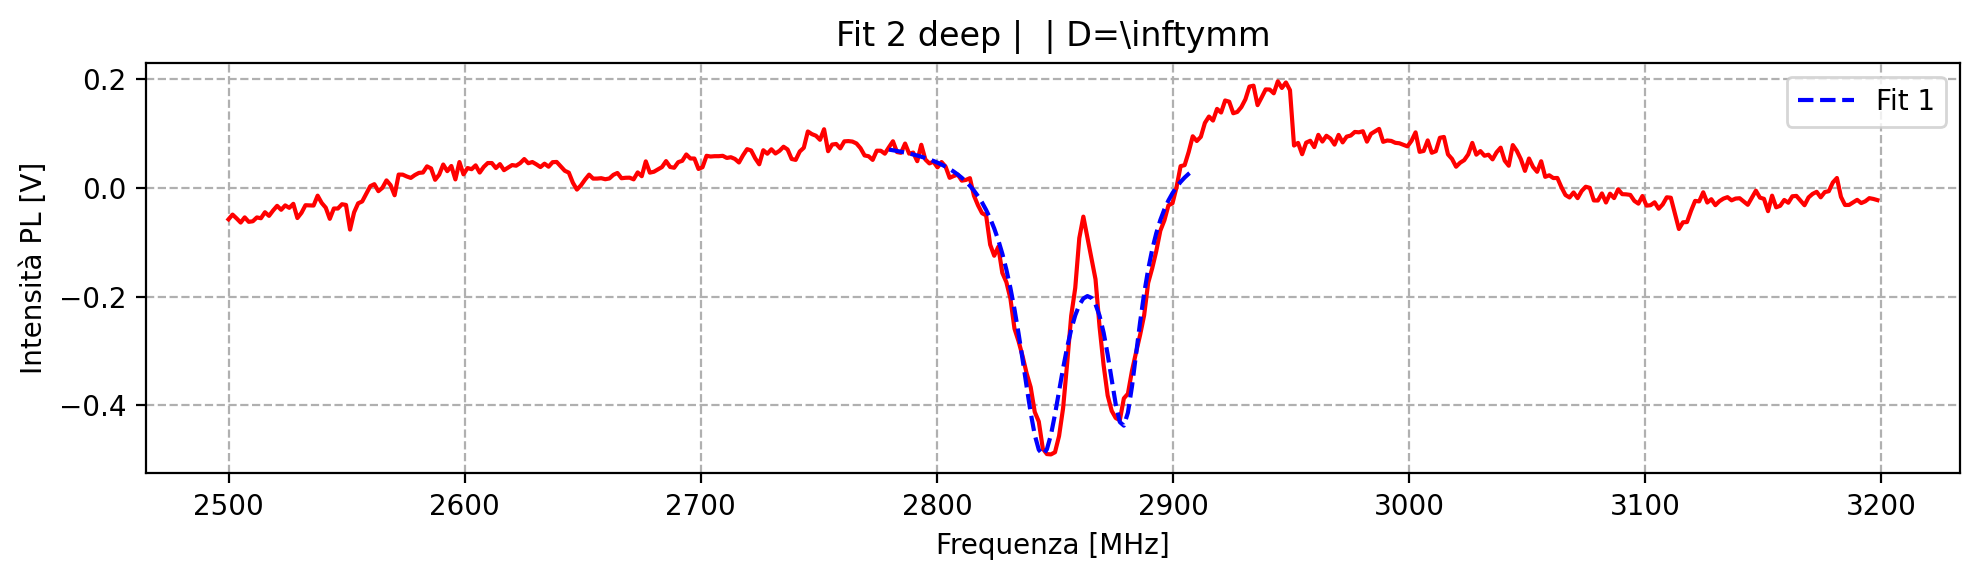

Fit insieme:
0. A=0.600213356165861, gamma=5.115828413132918, nu0=2815.0827195568927
1. A=1.1315654302948668, gamma=4.24967424412254, nu0=2841.7126818255447
2. A=1.0152116300031178, gamma=4.558362884285024, nu0=2869.782059645647
3. A=0.836568756624323, gamma=13.950278860922346, nu0=2893.6940731137274


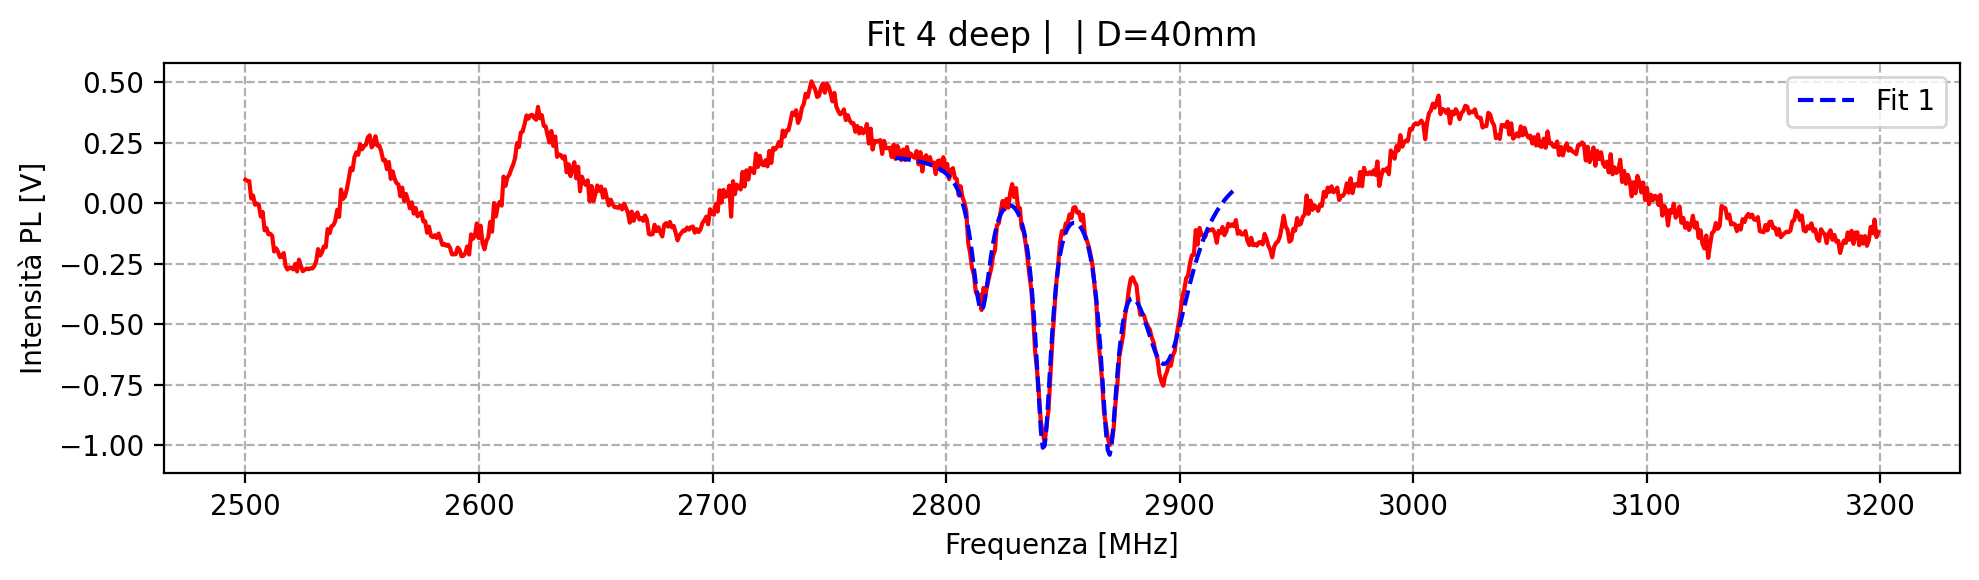

Fit insieme:
0. A=0.589217266952528, gamma=3.908777033484724, nu0=2815.6446513549713
1. A=1.2302546431663701, gamma=3.698489182234271, nu0=2844.1120876249406
2. A=1.1112527802217678, gamma=4.282796061350192, nu0=2873.5080472047725
3. A=0.7501858924590155, gamma=9.14498727272341, nu0=2898.400283059729


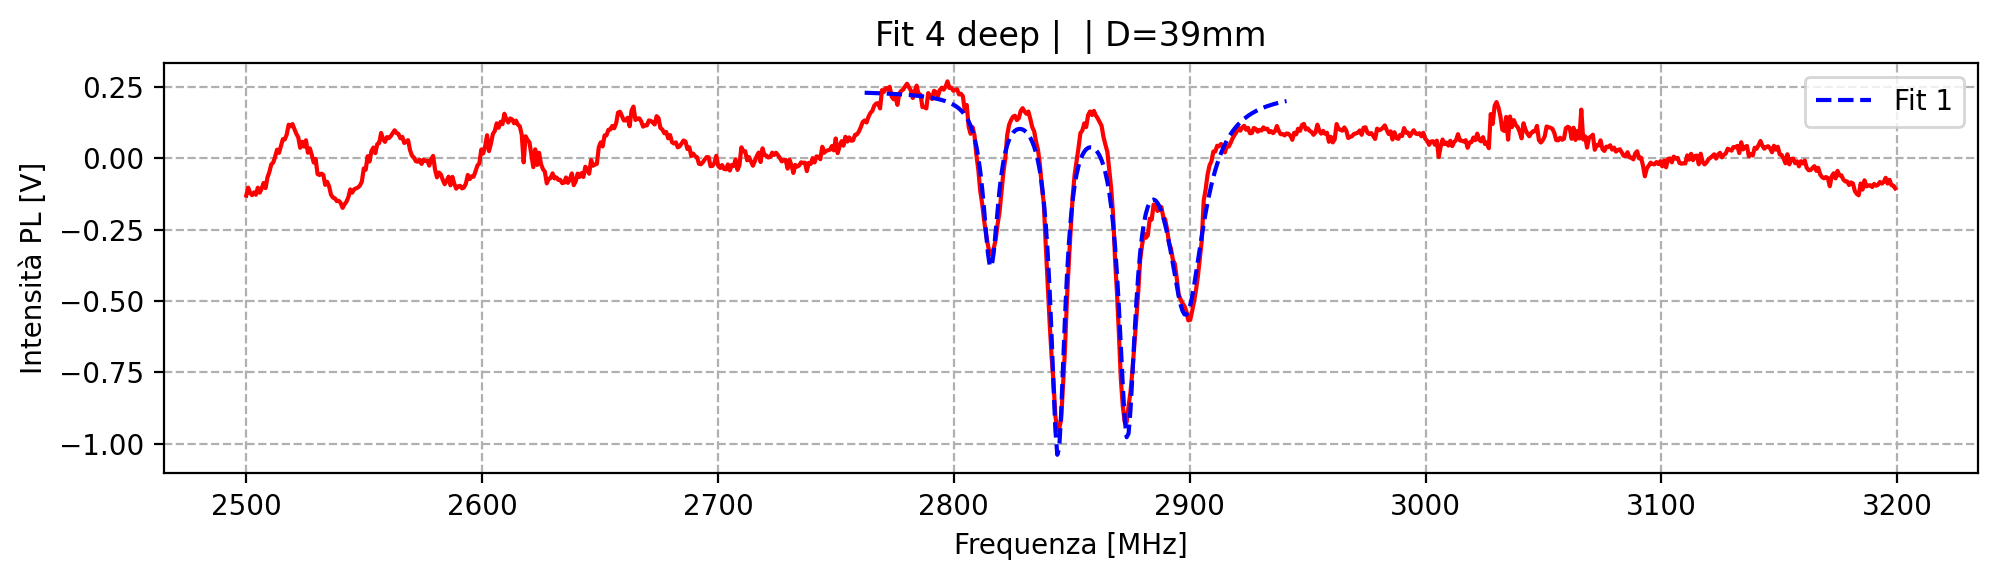

Fit insieme:
0. A=0.48358297965479197, gamma=5.96183655012044, nu0=2791.6304744237264
1. A=0.4961562385516835, gamma=4.367747415981661, nu0=2833.469234356835
2. A=0.6744057867046125, gamma=5.532479315248589, nu0=2878.5150382293114
3. A=0.5376284538248026, gamma=5.712724613061251, nu0=2916.039246862589


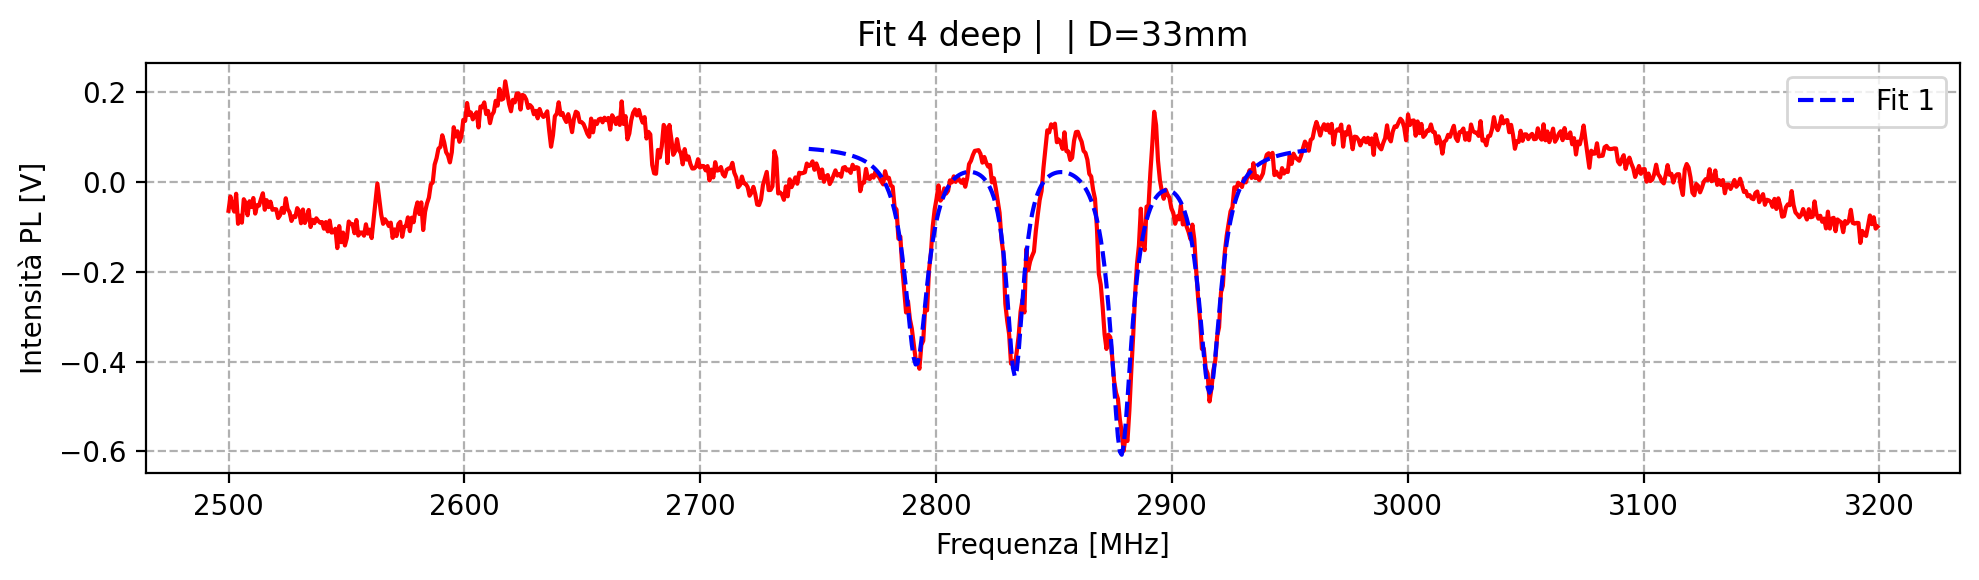

Fit insieme:
0. A=0.6275289440471672, gamma=3.8665019559663003, nu0=2777.6964141276007
1. A=0.55276990494013, gamma=4.592178097051828, nu0=2827.2159837297445
2. A=0.5274406246115048, gamma=3.7653255409694957, nu0=2837.1116935560685
3. A=0.574099096260446, gamma=4.470846432883191, nu0=2879.469040426418
4. A=0.6280204517019913, gamma=7.346032478578845, nu0=2888.4676216648354
5. A=0.608041648619311, gamma=6.530998556702765, nu0=2932.4972103268606


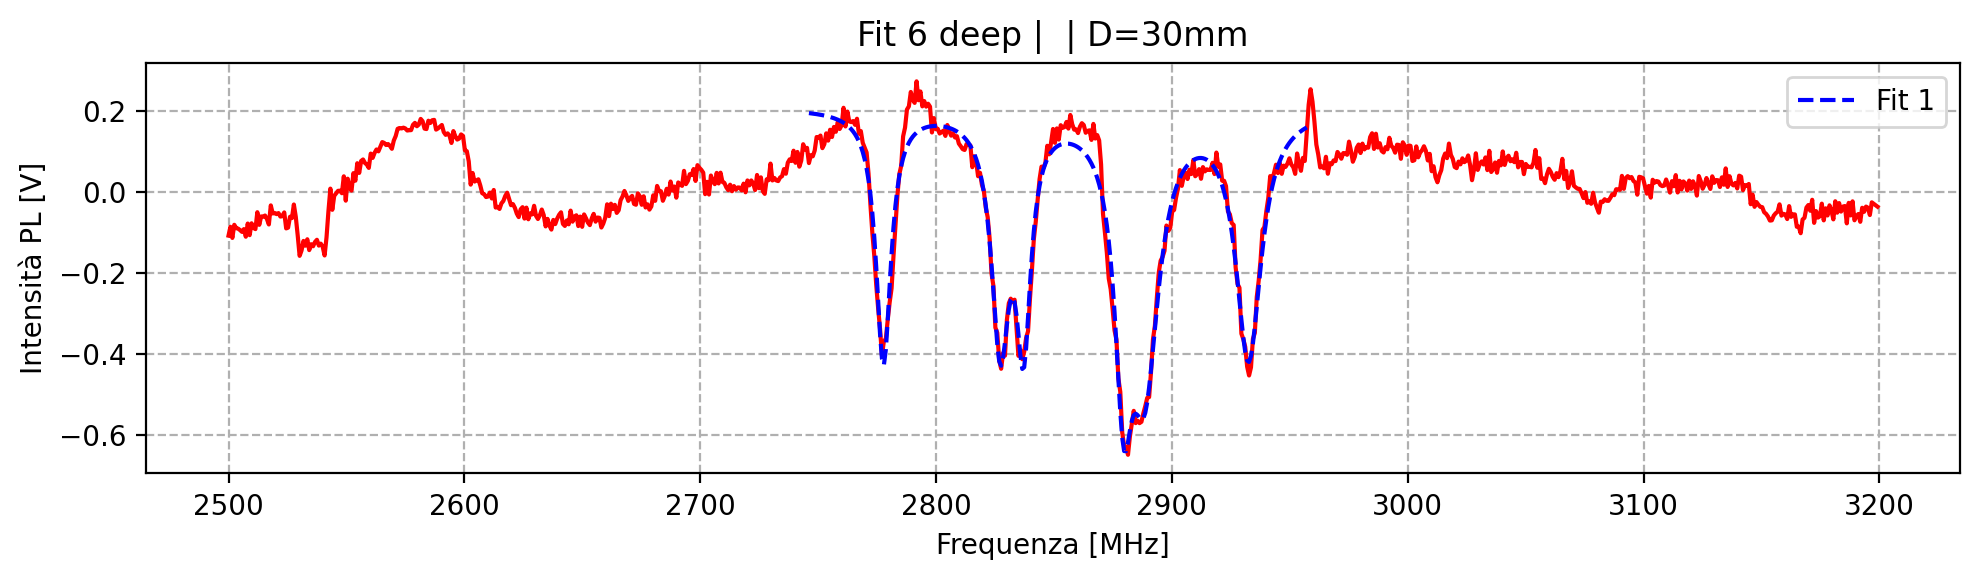

Fit insieme:
0. A=0.5432770528707292, gamma=5.659986027721433, nu0=2723.034709448518
1. A=0.5140371040099453, gamma=6.445155826969273, nu0=2806.819324680489
2. A=0.47277542350005913, gamma=3.6466108360098484, nu0=2832.3914350899713
3. A=0.4129224140963122, gamma=5.726534700405018, nu0=2894.2345495315303
4. A=0.47363441230862396, gamma=5.068791878868594, nu0=2919.0809679359363
5. A=0.4754160055358492, gamma=5.329902126679226, nu0=2986.7408459182884


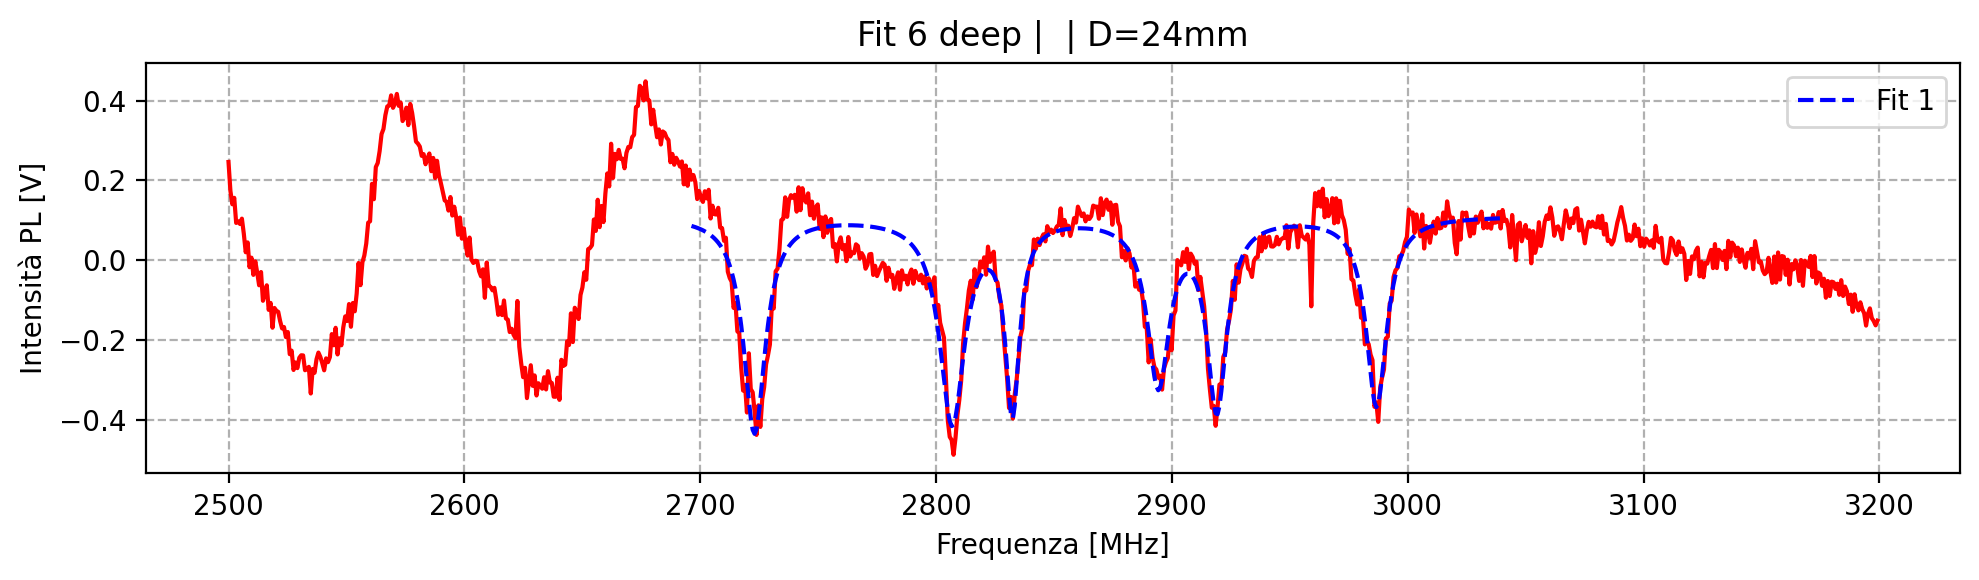

Fit separato:
0. A=0.9999999999999999, gamma=9.809143391900546, nu0=2699.547230417056
Fit insieme:
0. A=0.4237226219315456, gamma=7.2502038049836, nu0=2809.6545310096144
1. A=0.32172476962824326, gamma=4.214178859103861, nu0=2825.639268471838
2. A=0.5180104714631121, gamma=8.473228478376372, nu0=2897.002572405122
3. A=0.5008674666789807, gamma=5.644814126204337, nu0=2912.6072257117767
Fit separato:
0. A=0.545286115133718, gamma=5.706552997798739, nu0=3003.097414368365


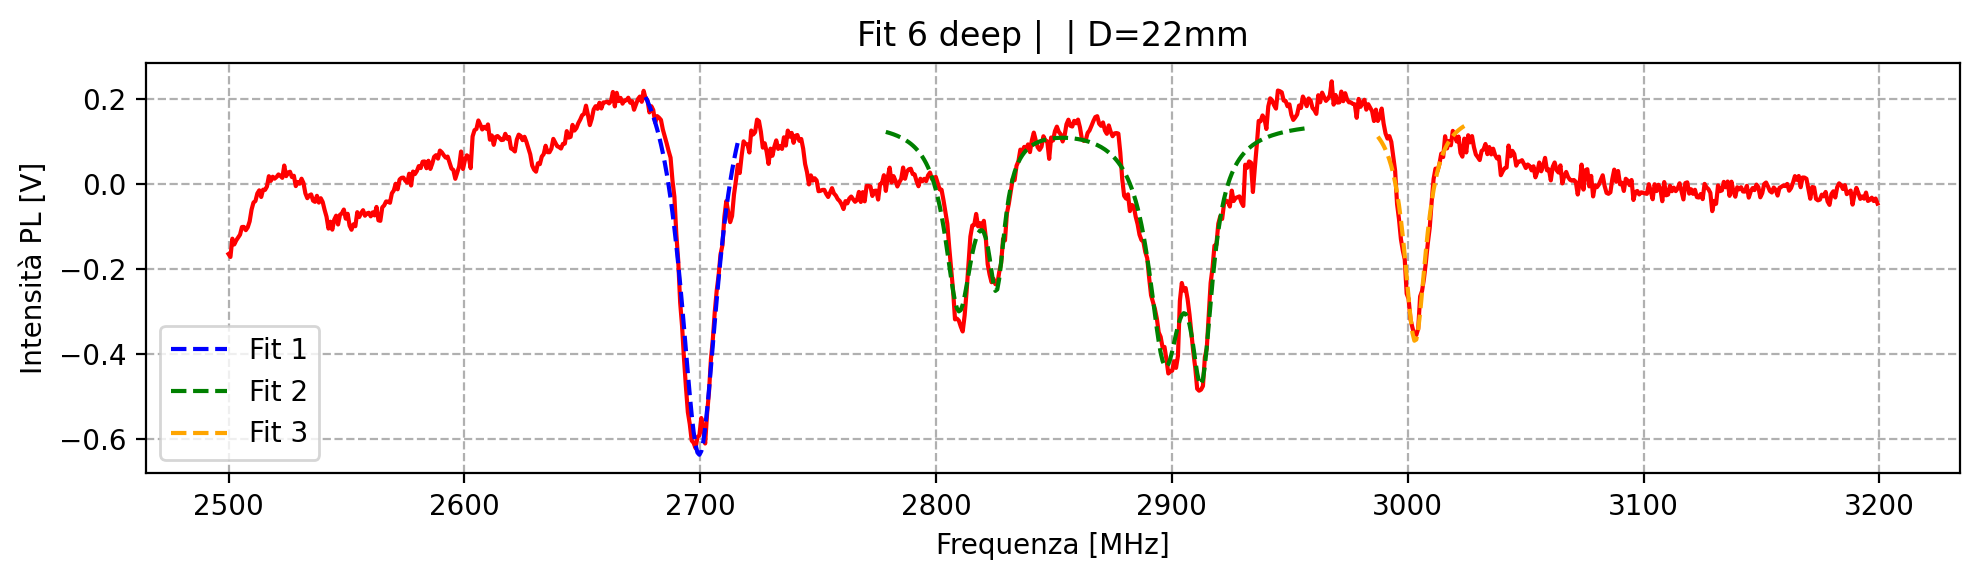

Fit separato:
0. A=0.963106335456873, gamma=9.214820899604055, nu0=2658.8914488612572
1. A=0.7289546967218219, gamma=4.803072362440268, nu0=2788.997574185997
2. A=0.4233825890670277, gamma=4.426532203091384, nu0=2827.7660500089733
3. A=0.4520678405089373, gamma=5.197964114936691, nu0=2925.2828936010437
4. A=0.5062920077002535, gamma=4.693684290585032, nu0=2961.408597344106
5. A=0.5828821985953289, gamma=6.907548316455679, nu0=3055.3982716451487


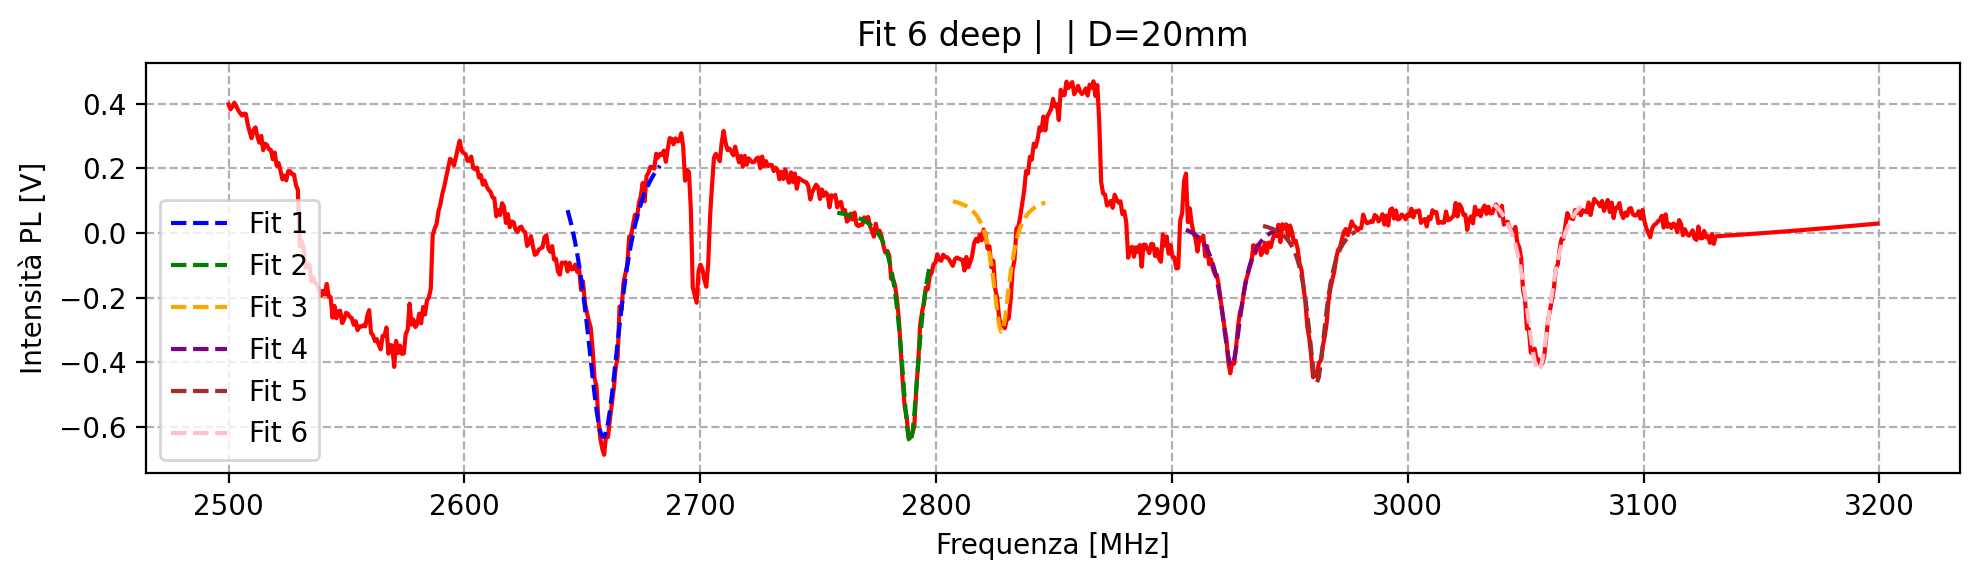

Fit separato:
0. A=0.5036569926523131, gamma=5.093817279112243, nu0=2642.9599099758593
1. A=0.4439263503238564, gamma=4.462213139787009, nu0=2789.583851588822
2. A=0.2713818144933362, gamma=4.21163357571625, nu0=2839.6731101319947
3. A=0.30925769099064365, gamma=5.708337488900851, nu0=2923.5519709217856
4. A=0.40482327262085743, gamma=5.53845246735868, nu0=2967.4812493426125
5. A=0.4552103765544002, gamma=7.561217620437176, nu0=3073.1097529862705


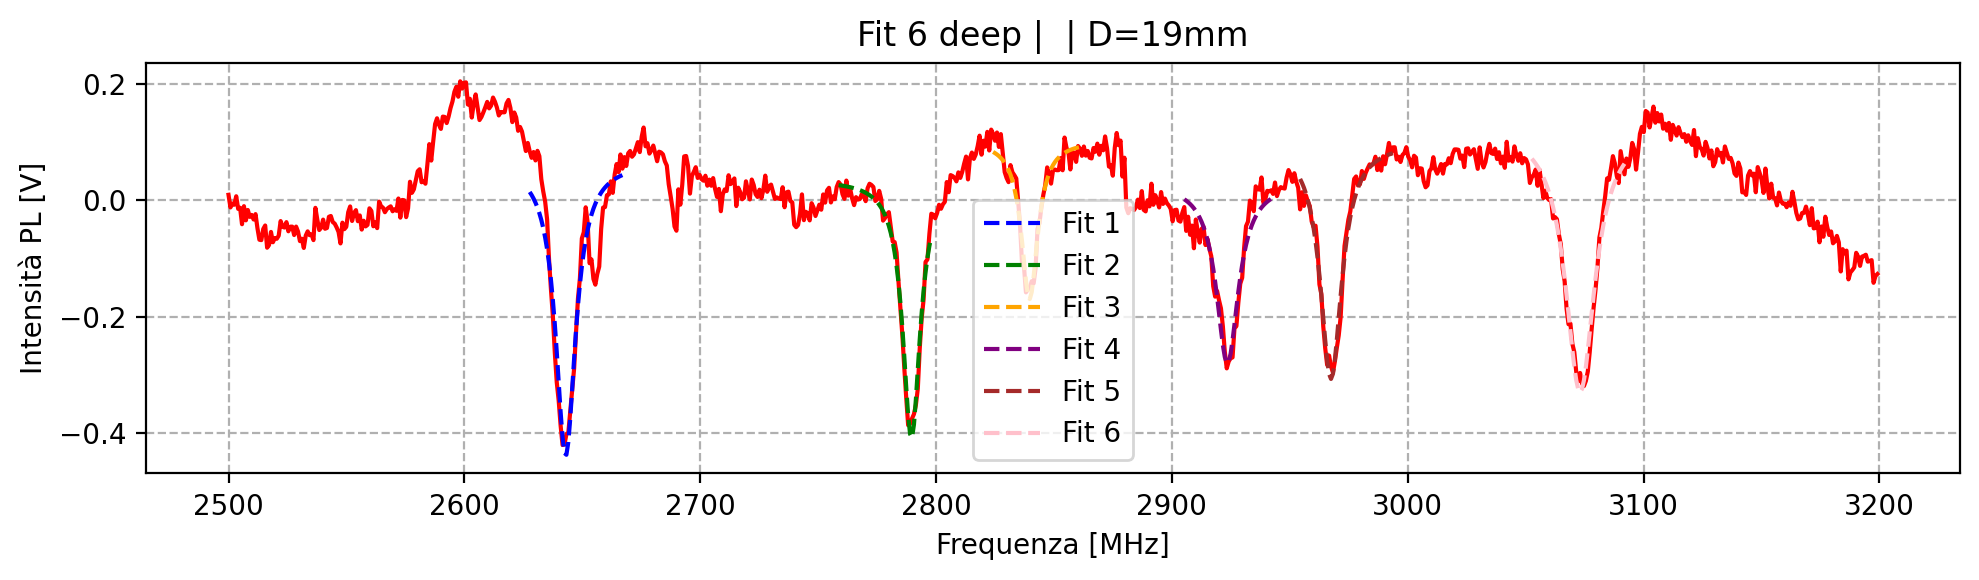

Fit separato:
0. A=0.6059162106403301, gamma=6.346260911990172, nu0=2583.03775057324
1. A=0.2996922789413196, gamma=5.918350096242948, nu0=2768.751598861063
2. A=0.20182400975359246, gamma=5.584227806104691, nu0=2834.4754542568216
3. A=0.14827424984172252, gamma=6.200274280270836, nu0=2941.803167798601
4. A=0.27222234526472483, gamma=5.606227240680292, nu0=2998.156102936485
5. A=0.33420694344919943, gamma=7.153611920976244, nu0=3121.04183740612


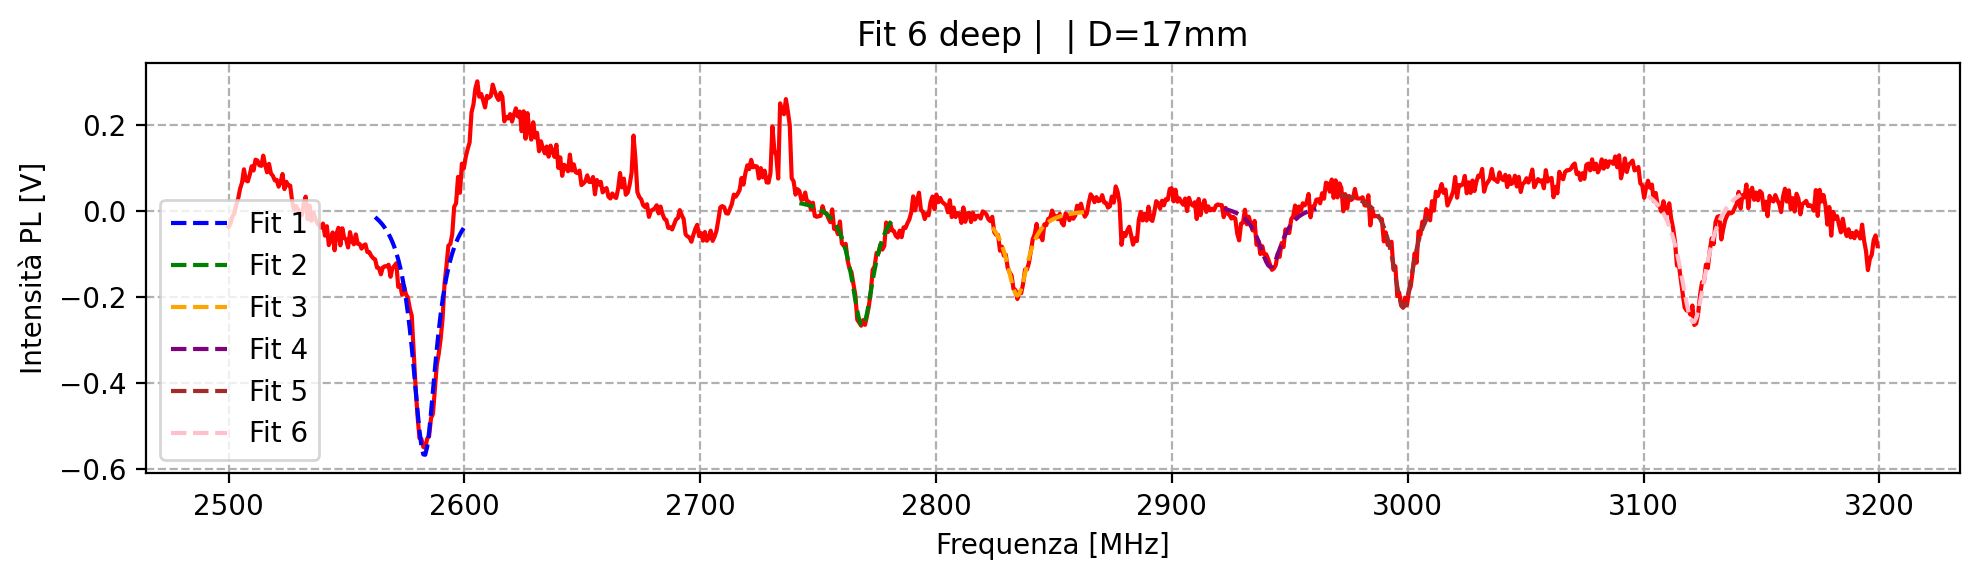

In [319]:
for idx, (N, region, dist, spettro) in enumerate(zip(Num_of_deeps, Central_regions, reversed(distanze), spettri)):
    
    fit_results[dist] = []
    
    # qui devono essere considerati insieme
    if idx < 6:
        params, curva = fitta_deep_insieme(spettro, N=N, regione=region, nu0s=Centers[idx])
        plot_odmr(spettro, 'od', dist=dist, fit_curves=[curva], title=f'Fit {N} deep | ')
        fit_results[dist] = [params[0][3*i+2] for i in range(N)]
    # in questo i 4 deep centrali vanno considerati insieme
    elif idx == 6:
        params_sx, curva_sx = fitta_deep_separati(spettro, N=1, regione=region, nu0s=[shifta(2560)])
        fit_results[dist] = [params_sx[0][0][0][2]]
        params_centro, curva_centro = fitta_deep_insieme(spettro, N=4, regione=(shifta(2585),shifta(2640)), nu0s=[shifta(2595), shifta(2600), shifta(2620), shifta(2630)])       
        fit_results[dist] += [params_centro[0][3*i+2] for i in range(4)] 
        params_dx, curva_dx = fitta_deep_separati(spettro, N=1, regione=region, nu0s=[shifta(2655)])
        fit_results[dist] += [params_dx[0][0][0][2]]

        lista_di_curve = curva_sx + [curva_centro] + curva_dx
        plot_odmr(spettro, 'od', dist=dist, fit_curves=lista_di_curve, title=f'Fit {N} deep | ')
    # qui, per evitare di considerare troppo il background, li considero separati
    else:
        params, n_curve = fitta_deep_separati(spettro, N=N, regione=region, nu0s=Centers[idx])
        plot_odmr(spettro, 'od', dist=dist, fit_curves=n_curve, title=f'Fit {N} deep | ')
        fit_results[dist] = [params[i][0][0][2] for i in range(N)]

In [320]:
fit_results

{1000: [np.float64(2844.556303702735), np.float64(2879.0042323433336)],
 40: [np.float64(2815.0827195568927),
  np.float64(2841.7126818255447),
  np.float64(2869.782059645647),
  np.float64(2893.6940731137274)],
 39: [np.float64(2815.6446513549713),
  np.float64(2844.1120876249406),
  np.float64(2873.5080472047725),
  np.float64(2898.400283059729)],
 33: [np.float64(2791.6304744237264),
  np.float64(2833.469234356835),
  np.float64(2878.5150382293114),
  np.float64(2916.039246862589)],
 30: [np.float64(2777.6964141276007),
  np.float64(2827.2159837297445),
  np.float64(2837.1116935560685),
  np.float64(2879.469040426418),
  np.float64(2888.4676216648354),
  np.float64(2932.4972103268606)],
 24: [np.float64(2723.034709448518),
  np.float64(2806.819324680489),
  np.float64(2832.3914350899713),
  np.float64(2894.2345495315303),
  np.float64(2919.0809679359363),
  np.float64(2986.7408459182884)],
 22: [np.float64(2699.547230417056),
  np.float64(2809.6545310096144),
  np.float64(2825.63926

---

# FREQUENZA V DISTANZA

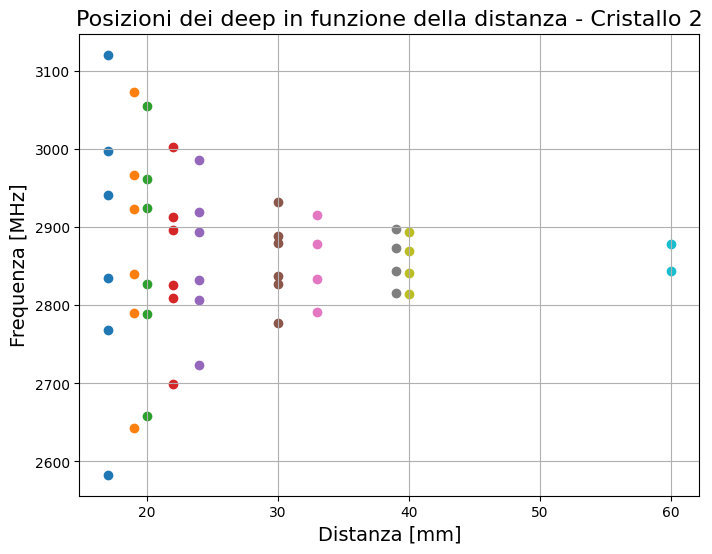

In [321]:
plt.figure(figsize=(8,6))
plt.title(f'Posizioni dei deep in funzione della distanza - Cristallo 2', fontsize=16)
plt.xlabel('Distanza [mm]', fontsize=14)
plt.ylabel('Frequenza [MHz]', fontsize=14)
distanze_esatte = distanze[:-1] + [60]  # metto 60 mm invece di infinito
for dist, dist_e in zip(distanze, distanze_esatte):
    plt.scatter([dist_e]*len(fit_results[dist]), fit_results[dist], label=f'Distanza {dist_e} mm')
#plt.legend()
plt.grid()
plt.show()

---

# Frequenza v B

I valori di B sono presi dal fit del magnete piccolo, vedi 4-fit_magneti.ipynb

La funzione con cui interpolare è: 
$$
\nu_\pm = D \pm \sqrt{E^2+(\gamma_{fit}\cdot B_{0})^{2}}
$$
con $D=2.87\ \text{GHz}$ e $E=10\ \text{MHz}$. Poi si ricava l'angolo con:
$$
\cos{\alpha} = \frac{\gamma_{fit}}{\gamma}
$$
in cui $\gamma=\pm28\ \text{GHzT}^{-1}$

In [322]:
previsioni_B = np.array([0.01685433, 0.01270503, 0.01110222, 0.00857636, 0.00671791,
       0.00345788, 0.00255966, 0.00147035, 0.00134735, 0])
err_B = [0.02128, 0.01618, 0.01420, 0.01106, 0.00874, 0.00463, 0.00348] #... non hanno senso questi errori!

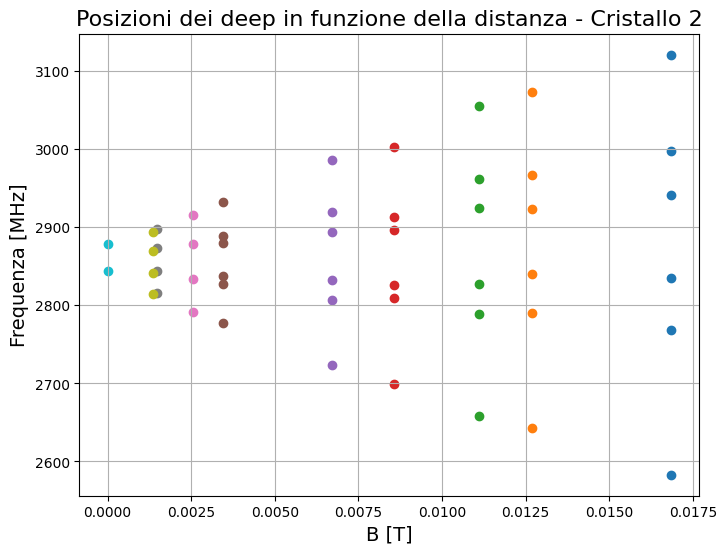

In [323]:
plt.figure(figsize=(8,6))
plt.title(f'Posizioni dei deep in funzione della distanza - Cristallo 2', fontsize=16)
plt.xlabel('B [T]', fontsize=14)
plt.ylabel('Frequenza [MHz]', fontsize=14)
for B, dist in zip(previsioni_B, distanze):
    plt.scatter([B]*len(fit_results[dist]), fit_results[dist], label=f'Distanza {B} T')
#plt.legend()
plt.grid()
plt.show()

### Fit Frequenza v B

Per fare il fit non posso usare le curve organizzate in questo modo. Mi serve un'array per ogni possibile curva 'che si allarga'. Il primo punto azzurro ha due curve con i due verdi dopo, che a loro volta vanno nei due rosa. Poi solo uno dei due rosa si separa e va in entrambi i marroni, mentre il rosa superiore finisce marrone solitario più in alto.

In [324]:
r_distanze = list(reversed(distanze))
r_B = list(reversed(previsioni_B))

In [325]:
# Sicuramente due vettori sono elementari: uno ha prende il primo elemento di ciascun array, l'altro l'ultimo.
primi, ultimi = [], []
for dist in r_distanze:
    primi.append(fit_results[dist][0])
    ultimi.append(fit_results[dist][-1])
# Poi ci sono i due intermedi, che prendono il secondo e il penultimo di tutti gli array, dopo il primo ovviamente.
intermedi1, intermedi2 = [], []
intermedi1.append(fit_results[1000][0]) # per la prima distanza ci sono solo due punti
intermedi2.append(fit_results[1000][1])
for dist in r_distanze[1:]:
    intermedi1.append(fit_results[dist][1])
    intermedi2.append(fit_results[dist][-2])
# Infine i due centrali. Dovrò prendere il terzo e il terzultimo elemento, 
# ma solo in quelli che hanno almeno 6 punti. Cioè il quarto indice dell'array distanze.
centrali1, centrali2 = [], []
centrali1.append(fit_results[1000][0]) # per la prima distanza ci sono solo due punti
centrali2.append(fit_results[1000][1])
for dist in r_distanze[1:4]:
    centrali1.append(fit_results[dist][1])
    centrali2.append(fit_results[dist][-2])
for dist in r_distanze[4:]:
    centrali1.append(fit_results[dist][2])
    centrali2.append(fit_results[dist][-3])

### Plot e Fit

In [326]:
def funzione_fit_plus(B, gamma_fit, D, dx):
    # D e E sarebbero fissi, ma gli lasciamo un minimo di libertà
    E = 10
    return D + np.sqrt(E**2 + (gamma_fit*(B+dx))**2)
def funzione_fit_minus(B, gamma_fit, D, dx):
    # Per le curve che scendono
    E = 10
    return D - np.sqrt(E**2 + (gamma_fit*(B+dx))**2)

# le curve che salgono hanno il più, quelle che scendono il meno (plus=False)
def fit_plot(B, freq, gamma_fit_0, D_0, label, color, plus=True, print_fit=True):
    
    p0 = [gamma_fit_0, D_0, 0] # gamma in GHz/T, D in MHz, E in MHz (ma plotto in MHz)
    upp = [gamma_fit_0*2, D_0+10,  np.inf] 
    low = [gamma_fit_0/2, D_0-10, -np.inf]

    popt, pcov = curve_fit(funzione_fit_plus if plus else funzione_fit_minus, B, freq, p0=p0, bounds=(low, upp), maxfev=1000000, sigma=[5]*len(B))
    perr = np.sqrt(np.diag(pcov))
    
    # Calcolo chi quadro ridotto
    if plus:
        fit_vals = funzione_fit_plus(B, *popt)
    else:
        fit_vals = funzione_fit_minus(B, *popt)
    residui = freq - fit_vals
    chi2 = np.sum((residui / 5)**2)
    dof = len(B) - len(popt)
    chi2_red = chi2 / dof if dof > 0 else float('nan')
    
    plt.errorbar(B, freq, color=color, fmt='o', yerr=[5]*len(B), markersize=1, capsize=3)
    B_fit = np.linspace(0, 0.018, 100)
    freq_fit = funzione_fit_plus(B_fit, *popt) if plus else funzione_fit_minus(B_fit, *popt)
    plt.plot(B_fit, freq_fit, label=label, color=color)
    
    if print_fit:
        print(f"{label}: gamma_fit={popt[0]:.3f} | D={popt[1]:.3f} | chi2_red={chi2_red:.2f}")
    
    return popt, perr, chi2_red

NV3: gamma_fit=13419.761 | D=2867.105 | chi2_red=2675.31
-NV3: gamma_fit=12626.009 | D=2858.577 | chi2_red=2252.35


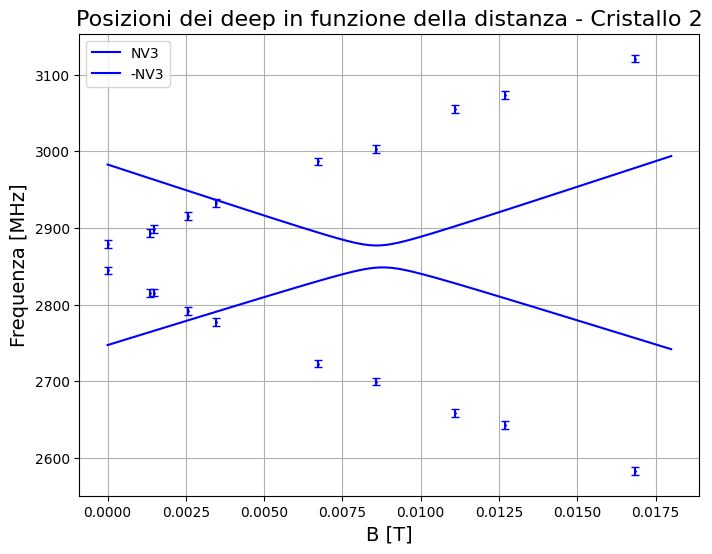

In [327]:
plt.figure(figsize=(8,6))
plt.title(f'Posizioni dei deep in funzione della distanza - Cristallo 2', fontsize=16)
plt.xlabel('B [T]', fontsize=14)
plt.ylabel('Frequenza [MHz]', fontsize=14)

fit_plot(np.array(r_B), np.array(primi), 16000, 2870,'NV3', 'blue')
#fit_plot(np.array(r_B), np.array(intermedi1), 6500, 2870, 'NV2', 'green')
#fit_plot(np.array(r_B), np.array(centrali1), 3000, 2870, 'NV1', 'red')
#fit_plot(np.array(r_B), np.array(centrali2), 3000, 2855, '-NV1', 'red', plus=False)
#fit_plot(np.array(r_B), np.array(intermedi2), 6500, 2855, '-NV2', 'green', plus=False)
fit_plot(np.array(r_B), np.array(ultimi), 16000, 2855, '-NV3', 'blue', plus=False)
plt.legend()
plt.grid()
plt.show()